In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
train_df = pd.read_csv('Data/census_income_learn.csv', header=None)
test_df = pd.read_csv('Data/census_income_test.csv', header=None)

# Quick data overview
print(train_df.shape)
print(test_df.shape)

(199523, 42)
(99762, 42)


In [97]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [98]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
99758,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
99759,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,- 50000.
99760,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [99]:
#from metadata
column_names = [
    'age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode',
    'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status',
    'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin',
    'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat',
    'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status',
    'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat',
    'detailed_household_summary_in_household', 'instance_weight', 'migration_code_change_in_msa',
    'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18',
    'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self',
    'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 
    'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'
]

train_df.columns = column_names
test_df.columns = column_names
train_df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [100]:
train_df.iloc[2, 0:25]

age                                                                              18
class_of_worker                                                     Not in universe
detailed_industry_recode                                                          0
detailed_occupation_recode                                                        0
education                                                                10th grade
wage_per_hour                                                                     0
enrolled_in_edu_inst_last_wk                                            High school
marital_status                                                        Never married
major_industry_code                                     Not in universe or children
major_occupation_code                                               Not in universe
race                                                      Asian or Pacific Islander
hispanic_origin                                                           Al

In [101]:
train_df.iloc[2, 25:42]
#some columns have '?' for missing value
#handled in feature engineering 

migration_code_change_in_msa                                                    ?
migration_code_change_in_reg                                                    ?
migration_code_move_within_reg                                                  ?
live_in_this_house_1_year_ago                    Not in universe under 1 year old
migration_prev_res_in_sunbelt                                                   ?
num_persons_worked_for_employer                                                 0
family_members_under_18                                           Not in universe
country_of_birth_father                                                   Vietnam
country_of_birth_mother                                                   Vietnam
country_of_birth_self                                                     Vietnam
citizenship                                   Foreign born- Not a citizen of U S 
own_business_or_self_employed                                                   0
fill_inc_questio

In [102]:
#clean target variable

train_df['income_level'] = (
    train_df['income_level']
    .str.replace('.', '', regex=False)
    .astype(str)          # ensure string
    .str.strip()          # remove leading/trailing spaces
    .str.replace(' ', '', regex=False)  # remove inner spaces
)

test_df['income_level'] = (
    test_df['income_level']
    .str.replace('.', '', regex=False)
    .astype(str)          # ensure string
    .str.strip()          # remove leading/trailing spaces
    .str.replace(' ', '', regex=False)  # remove inner spaces
)

### Numeric Variables EDA

In [103]:
# Convert numeric columns to proper data types // from metadata; 7 total and remaining 33 are nominal
numeric_cols = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 
                'dividends_from_stocks', 'instance_weight', 'num_persons_worked_for_employer', 
                'weeks_worked_in_year']

# Convert columns to numeric type
train_df[numeric_cols] = train_df[numeric_cols].apply(pd.to_numeric)
test_df[numeric_cols] = test_df[numeric_cols].apply(pd.to_numeric)

In [104]:
train_df[numeric_cols].describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,weeks_worked_in_year
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,52.000000


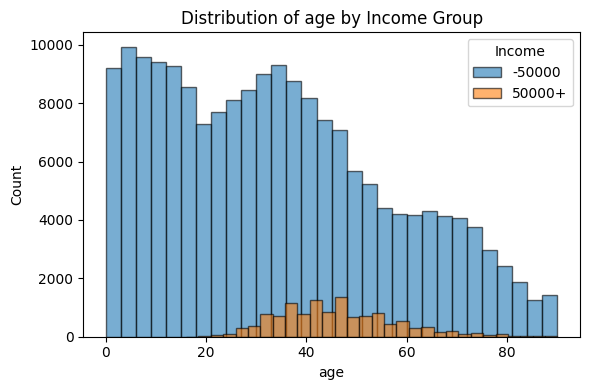

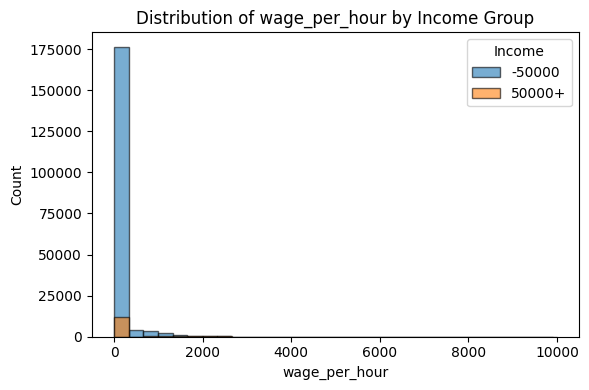

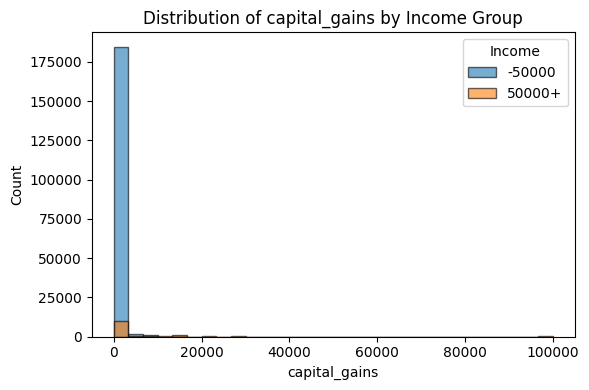

/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


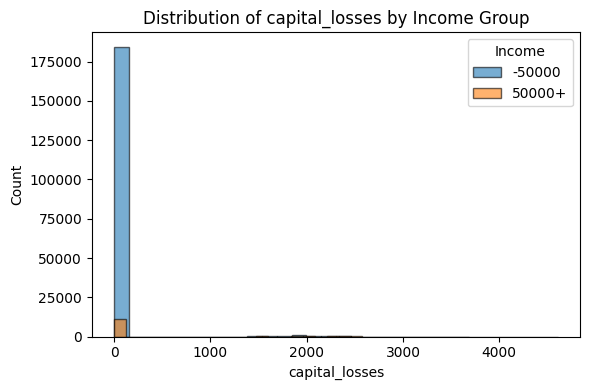

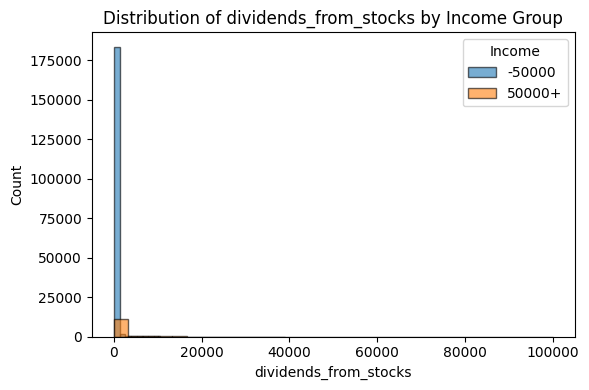

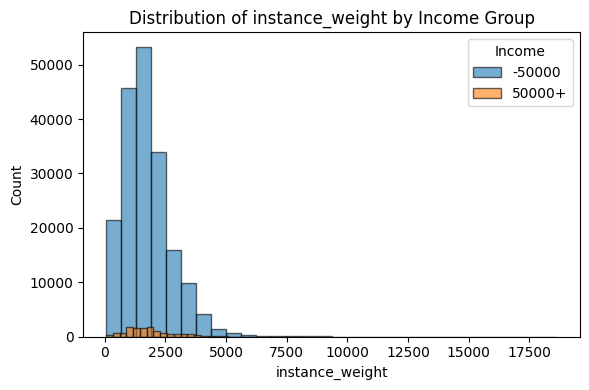

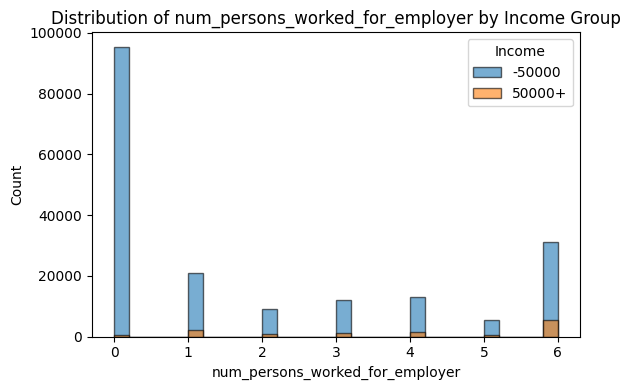

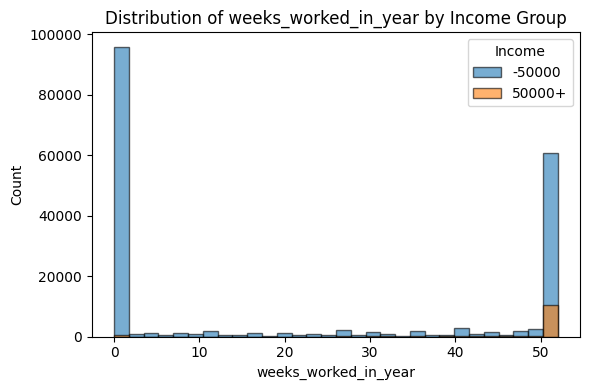

In [105]:
import matplotlib.pyplot as plt

# Loop through numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))

    for income_class in train_df['income_level'].unique():
        subset = train_df[train_df['income_level'] == income_class]
        plt.hist(subset[col].dropna().astype(float), bins=30, alpha=0.6, edgecolor='black', label=income_class)

    plt.title(f'Distribution of {col} by Income Group')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

In [106]:
#edge case check - 596 rows of total 199K rows 
#This is logically inconsistent — someone who reported zero weeks of work but high income. Additionally, we have data on passive income like owning a business. 

train_df[(train_df['weeks_worked_in_year'] == 0) & (train_df['income_level'] == '50000+')]

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income_level
88,54,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,50000+
411,86,Not in universe,0,0,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,No,1,0,94,50000+
570,34,Not in universe,0,0,Some college but no degree,0,Not in universe,Divorced,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,50000+
623,57,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,?,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,50000+
787,70,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Germany,Germany,United-States,Native- Born in the United States,0,Not in universe,2,0,94,50000+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198763,85,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,Ireland,United-States,Native- Born in the United States,0,Not in universe,2,0,94,50000+
198893,79,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0,94,50000+
199055,66,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,No,1,0,95,50000+
199091,28,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Never married,Not in universe or children,Not in universe,...,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,0,94,50000+


In [107]:
train_df['num_persons_worked_for_employer'].value_counts() # likely binned into 7 categories 

num_persons_worked_for_employer
0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: count, dtype: int64

In [108]:
print((train_df['capital_gains'].astype(float) > 0).mean()) #0.036
print((train_df['capital_losses'].astype(float) > 0).mean()) #0.012
print((train_df['dividends_from_stocks'].astype(float) > 0).mean()) #0.001

#sparse features and notes:
# can cause overfitting 
# it may take more space to store the data which increases the space complexity
# time complextiy in training 
# some models may not perform as expected // e.g. logistic regression 


# treating  // convert the feature to dense can also shorten training time 

0.03698320494379094
0.019576690406619787
0.10595770913629005


In [109]:
train_df[numeric_cols].astype(float).corr()

#as you work for bigger company, you are likely to work more weeks in a year (company size and weeks worked in year)
# All other correlations are weak -> good sign (less collinearity).      

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,weeks_worked_in_year
age,1.000000,0.036938,0.053590,0.063351,0.104976,-0.001611,0.140887,0.206181
wage_per_hour,0.036938,1.000000,-0.001082,0.010993,-0.005731,0.012353,0.191543,0.195687
capital_gains,0.053590,-0.001082,1.000000,-0.012700,0.131476,0.002549,0.058015,0.083549
capital_losses,0.063351,0.010993,-0.012700,1.000000,0.042427,0.008052,0.084255,0.100762
dividends_from_stocks,0.104976,-0.005731,0.131476,0.042427,1.000000,-0.000009,0.007206,0.013823
instance_weight,-0.001611,0.012353,0.002549,0.008052,-0.000009,1.000000,0.042778,0.029240
num_persons_worked_for_employer,0.140887,0.191543,0.058015,0.084255,0.007206,0.042778,1.000000,0.747302
weeks_worked_in_year,0.206181,0.195687,0.083549,0.100762,0.013823,0.029240,0.747302,1.000000


Observations from Numeric Variable Distributions:

Weeks Worked
- Most individuals earning >$50k worked 50+ weeks/year
- Anomaly: small orange bit representing some records with >$50k earner with 0 weeks worked

Employment Features
- num_persons_worked_for_employer appears binned (max=6)

instance_weight similarly distributed across income groups
  - Suggests effective stratified sampling

Right-Skewed Features (Log Transform Candidates)
- dividends_from_stocks 
- capital_gains
- capital_losses  
- wage_per_hour

Feature Engineering Ideas
- wage_per_hour: bin into low/medium/high categories
- age: test non-linear relationship with income via bins/polynomials
- Create binary flags for sparse features (e.g. has_dividends)
- Log Transform sparse features

Data Quality Analysis

1. Sparsity (Non-Zero %)
   - capital_gains: 3.7%
   - capital_losses: 2.0% 
   - dividends_from_stocks: 10.6%

2. Correlations
   - Strong (0.75): num_persons_worked_for_employer & weeks_worked_in_year
     - Consider dropping one or combining
   - Other correlations weak (good for modeling)

3. Edge Cases
   - 596 rows (of 199k) with income >$50k but 0 weeks worked
   - Options:
     - Drop records
     - Flag as edge cases for explainability

PCA Considerations
Good For:
- Correlated numeric features
- Dense features

Poor For:  
- Binary/sparse variables
- Highly skewed distributions

### Categorical Variables EDA

In [110]:
# categorical variables segmented by their characteristics 
income_markers = [
    'education', 
    'marital_status', 
    'class_of_worker', 
    'sex', #sensitive variable included in the analysis but not in model training
    'race', #sensitive variable included in the analysis but not in model training
    'full_or_part_time_employment_stat',
    'major_occupation_code', 
    'member_of_labor_union', 
    'tax_filer_status'
]

household_cols = [
    'detailed_household_and_family_stat',
    'detailed_household_summary_in_household',
    'family_members_under_18'
]

education_work_cols = [
    'enrolled_in_edu_inst_last_wk',
    'reason_for_unemployment',
    'detailed_occupation_recode',
    'detailed_industry_recode',
    'major_industry_code'
]

migration_cols = [
    'migration_code_change_in_msa',
    'migration_code_change_in_reg',
    'migration_code_move_within_reg',
    'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt',
    'region_of_previous_residence',
    'state_of_previous_residence'
]

demographic_cols = [
    'hispanic_origin',
    'citizenship',
    'country_of_birth_self',
    'country_of_birth_father',
    'country_of_birth_mother'
]

veteran_cols = [
    'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veteran_admin',
    'veterans_benefits'
]

In [111]:
def plot_categorical_eda(columns, title_group):
    for col in columns:
        if col not in train_df.columns:
            print(f"[WARNING] Column '{col}' not in DataFrame.")
            continue

        plt.figure(figsize=(10, 4))

        # Bar plot: count
        plt.subplot(1, 2, 1)
        train_df[col].value_counts(dropna=False).plot(kind='bar', edgecolor='black')
        plt.title(f'Count by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        # Proportion of >50K
        plt.subplot(1, 2, 2)
        prop = (
            train_df.groupby(col)['income_level']
            .apply(lambda x: (x == '50000+').mean())
            .sort_values(ascending=False)
        )
        prop.plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'>50K Proportion by {col}')
        plt.xlabel(col)
        plt.ylabel('% > 50K')
        plt.xticks(rotation=45, ha='right')

        plt.suptitle(f'Categorical EDA: {col}', fontsize=12)
        plt.tight_layout()
        plt.show()

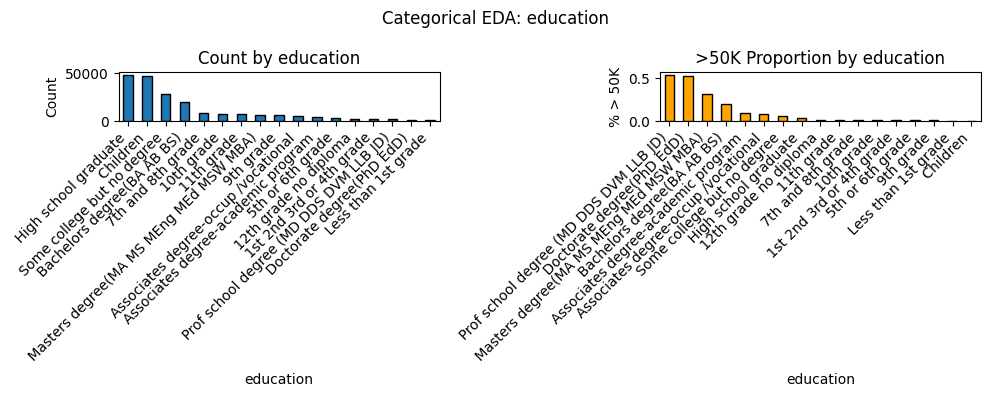

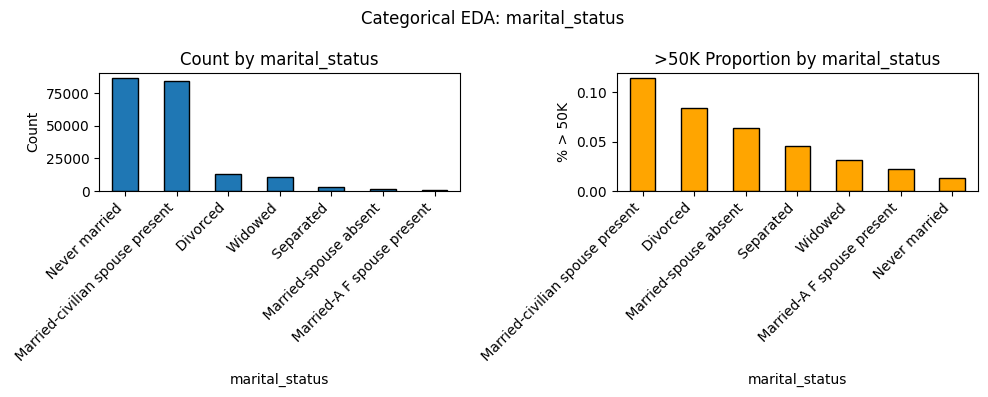

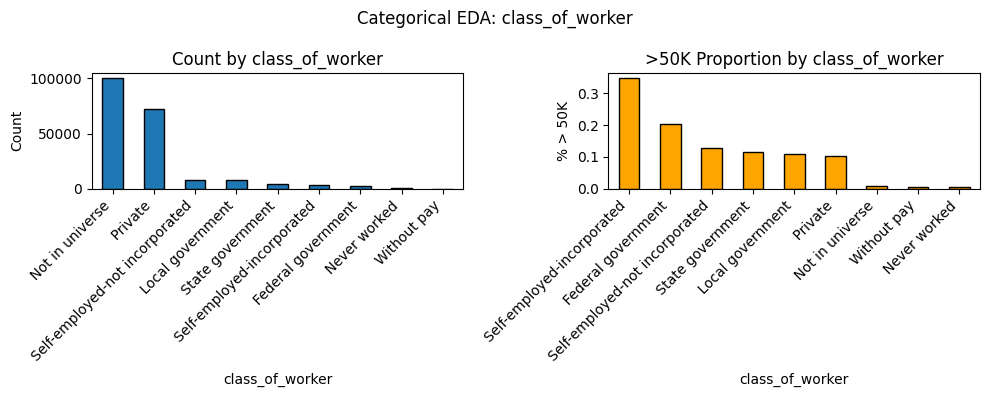

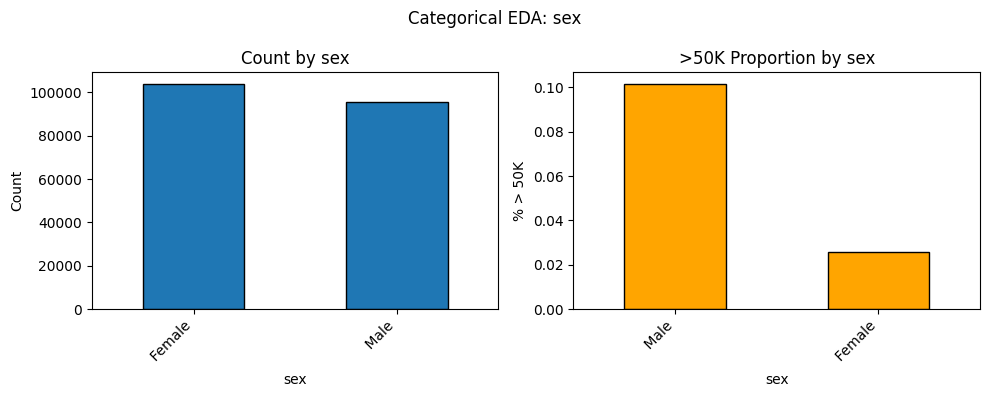

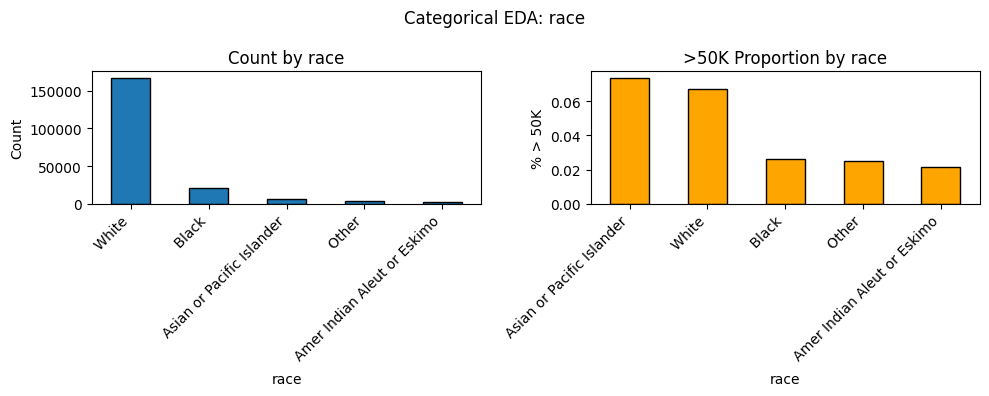

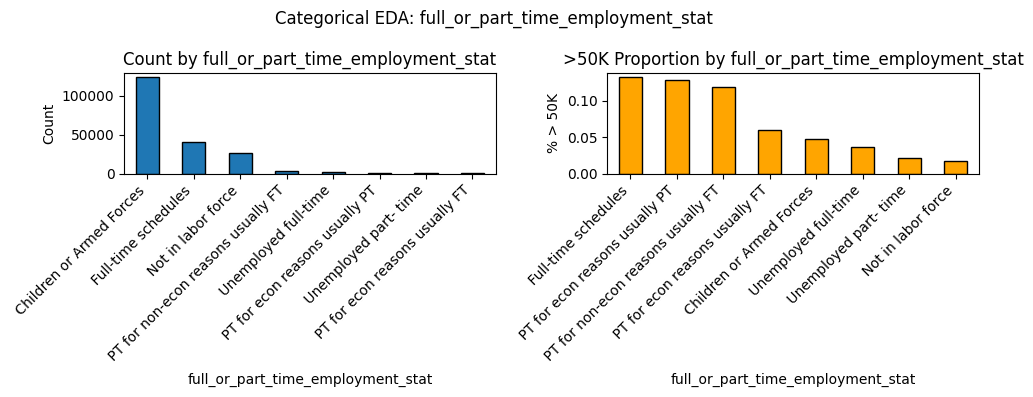

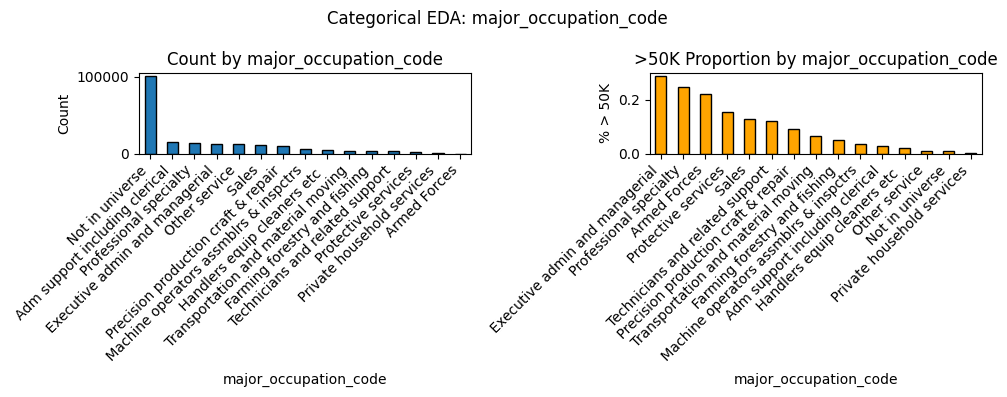

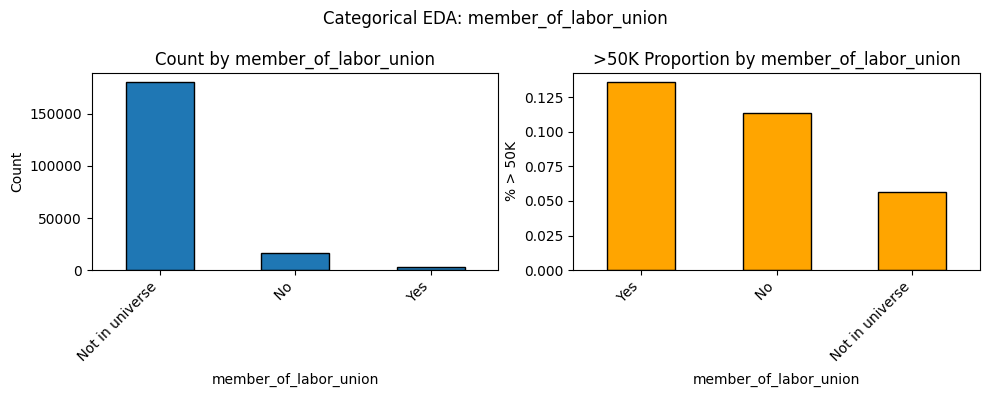

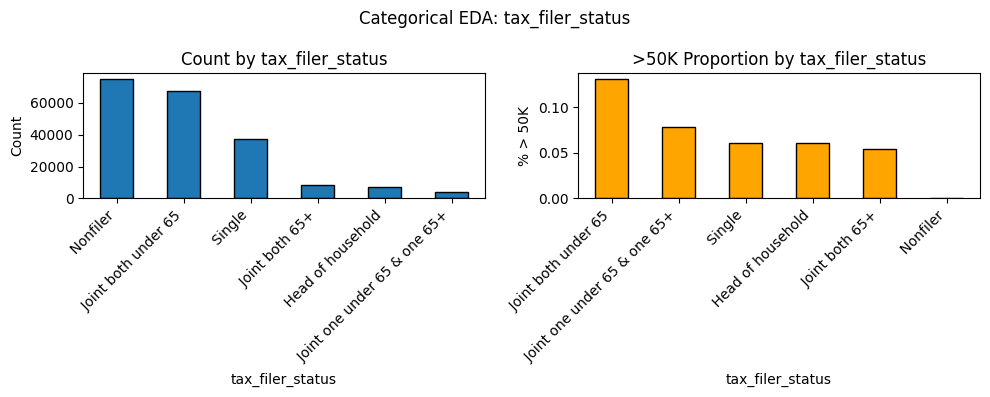

In [112]:
plot_categorical_eda(income_markers, "Income Markers")

Initial Data Analysis Findings

- Income Distribution Patterns
  - Tax filer status shows up to 15% earn >50K, with no nonfilers in >50K bracket
    -  Majority are non-filers in the data
  - Labor union membership is rare but correlates strongly with >50K income
  - Certain occupations show clear correlation with >50K income
  - Among >50K earners, Asian/Pacific Islanders are majority, followed by White
  - Whites dominate overall training data
  - Slight female majority in data but males show much higher >50K representation
  - Self-employed dominate >50K group while private sector employees are majority overall
  - Married with civilian spouse present are most common after never married, and majority in >50K group
  - Higher education strongly correlates with >50K income

Feature Engineering Ideas

- Tax Filer Status
  - Can be binarized to "is_filer" (Y/N) since 100% of tax-filers are >50K
  - Check for correlations with education/marital status

- Labor Union
  - Create binary flag (in_labor_union = 1/0)
  - Consider interactions with occupation/industry features

- Employment Categories  
  - Group low-frequency categories (e.g., "Never worked", "Without pay" → "Other")

- Marital Status
  - Aligns with U.S. tax structure and income patterns
  - Consider ordinal encoding based on income ratio:
    - Married > Divorced > Never Married > Widowed > Separated
  - Alternative: one-hot encoding

- Education
  - Can be ordinally encoded using mean income or rank
  - Consider grouping rare advanced degrees

- Ethical Considerations
  - Systemic wage disparity raises fairness concerns for prediction
  - Race variable requires careful handling:
    - Document approach (e.g., "used for understanding, not prediction")
    - Consider bias/fairness trade-offs in modeling

In [113]:
#is tax_filer_status highly correlated with education or marital status?

# Redundancy: If two features are strongly dependent, one may not add much value.
# Model Stability: Highly correlated categorical variables can cause multicollinearity issues in linear models (e.g., logistic regression).
# Feature Selection: Avoid adding too many similar one-hot-encoded features.

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

print(cramers_v(train_df['tax_filer_status'], train_df['education']))  # 0.35 -> moderate
print(cramers_v(train_df['tax_filer_status'], train_df['marital_status']))  # 0.46 -> moderate / often

0.35470256491393204
0.46994814452878675


- Tax Filing Status is moderately influenced by Education level
- Tax Filing status is often determined by Marital Status

while tree based models like random forest or xgboost are more forgiving of multicollinearity, linear models like logistic regression are not (coefficients become unstable & inflated variance)
still refining redundant features can improve interpretability 

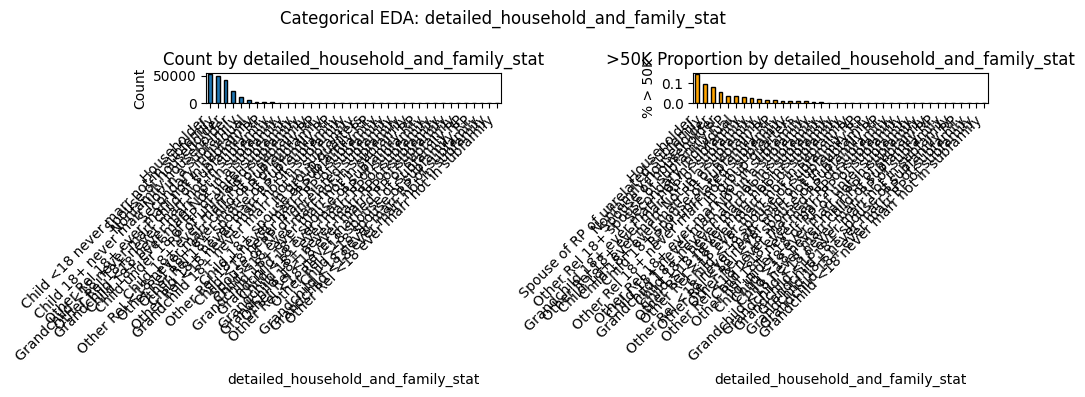

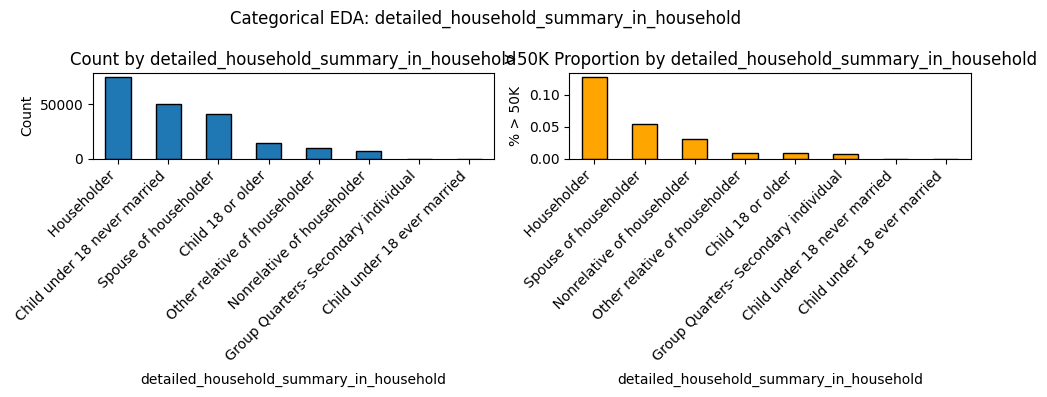

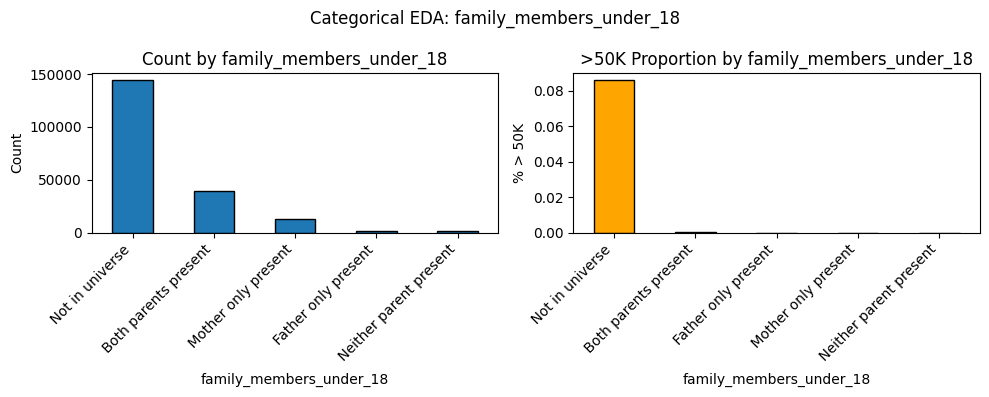

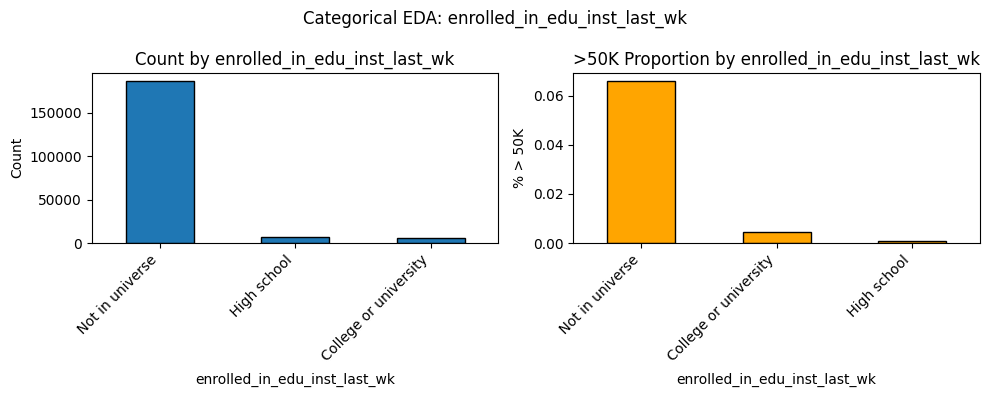

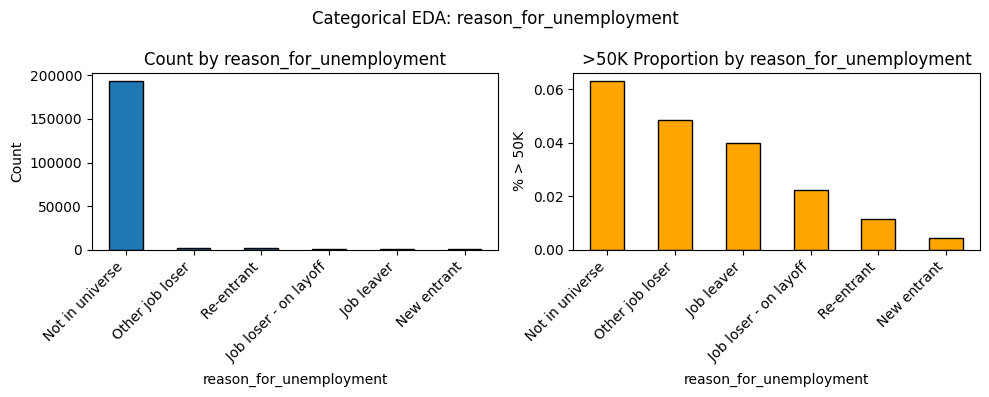

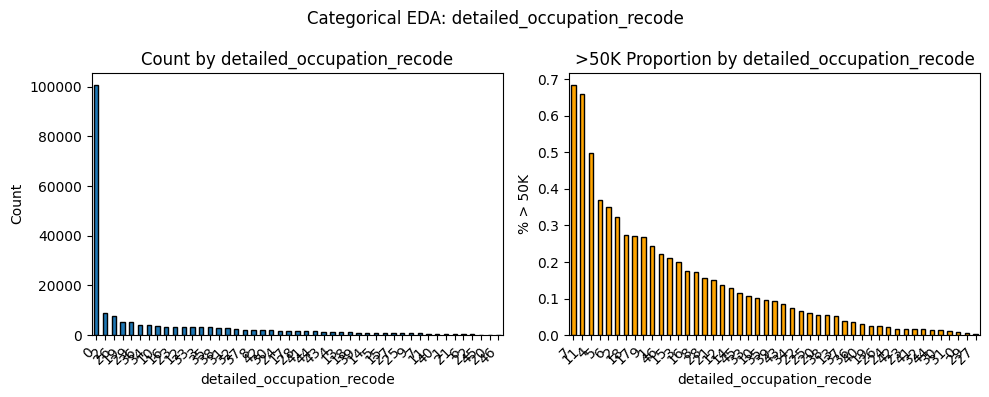

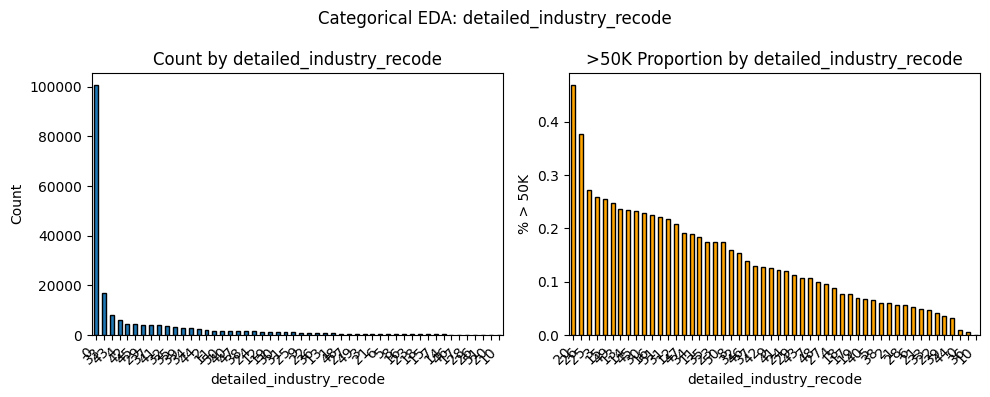

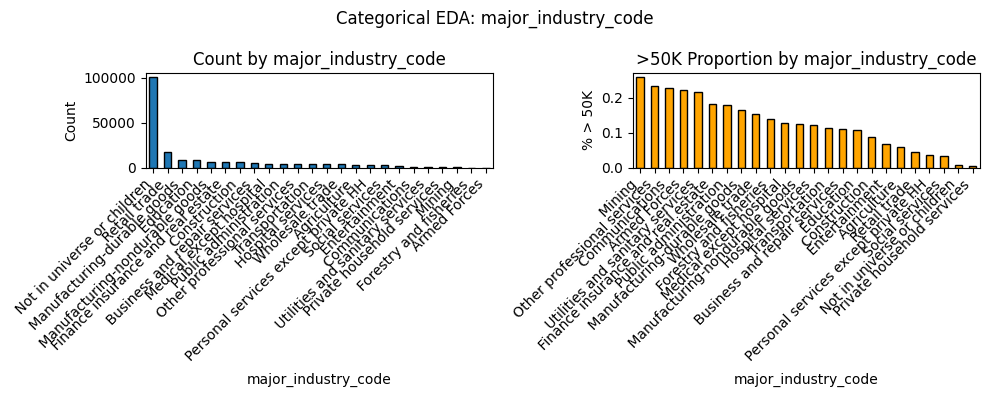

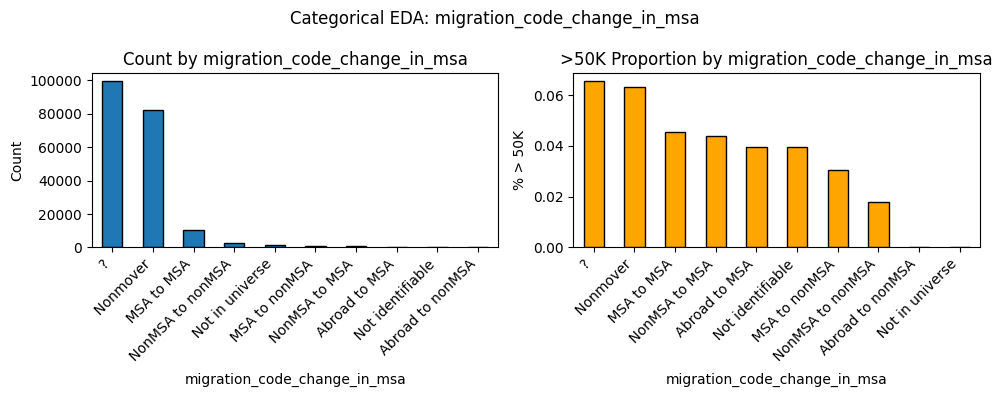

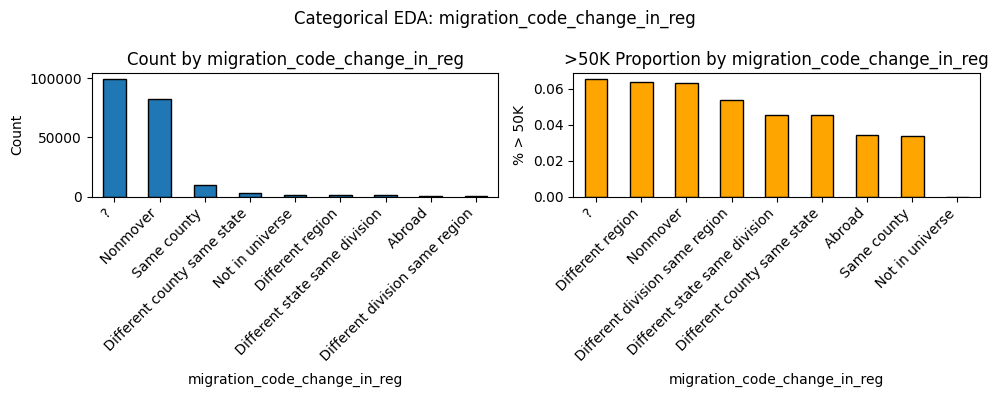

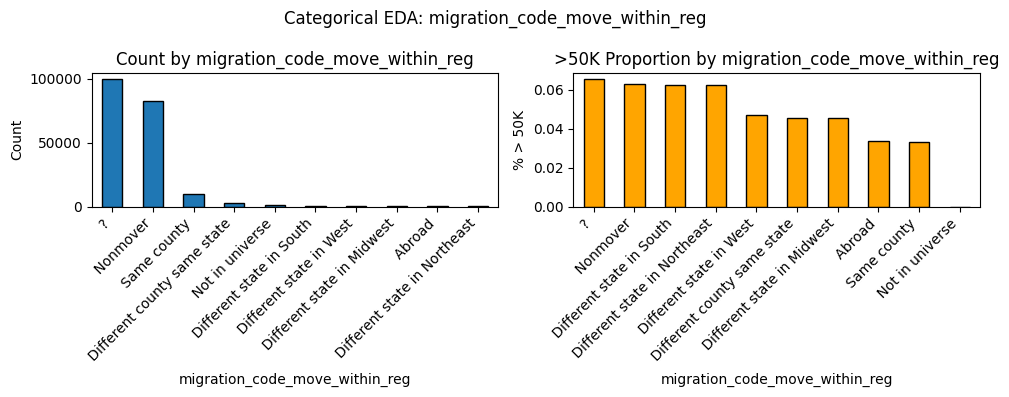

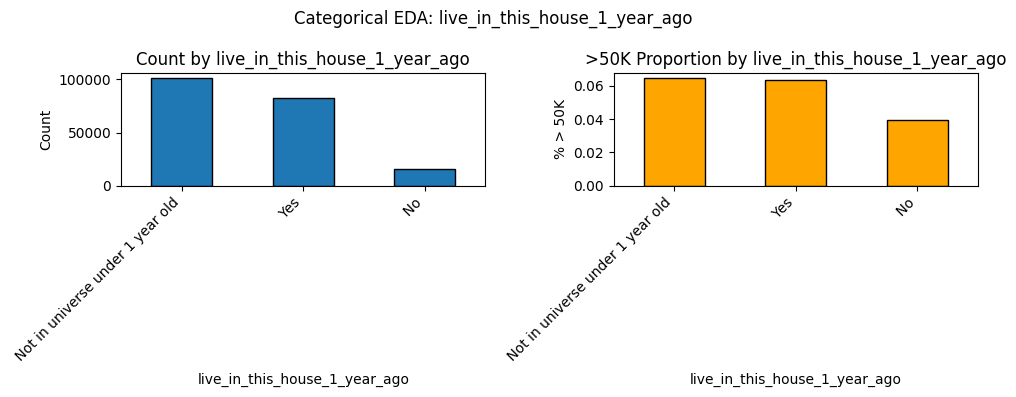

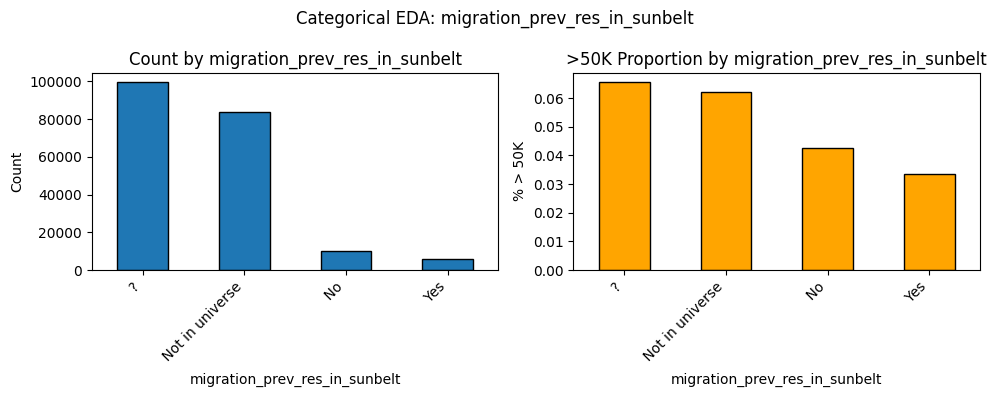

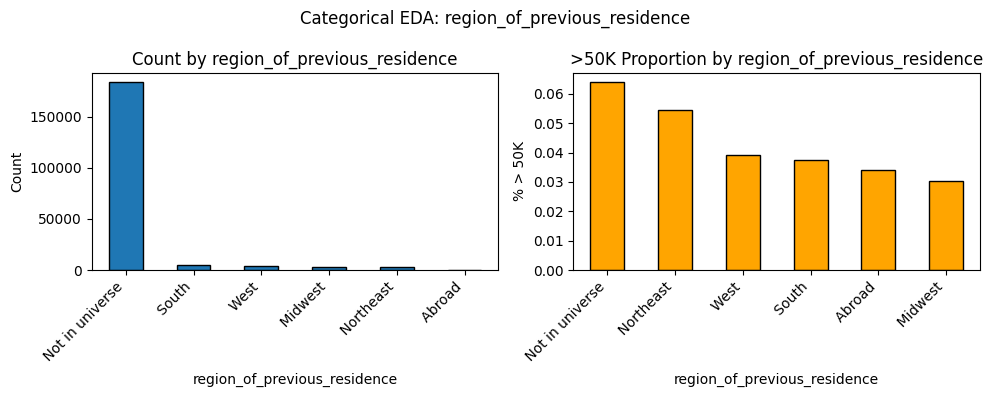

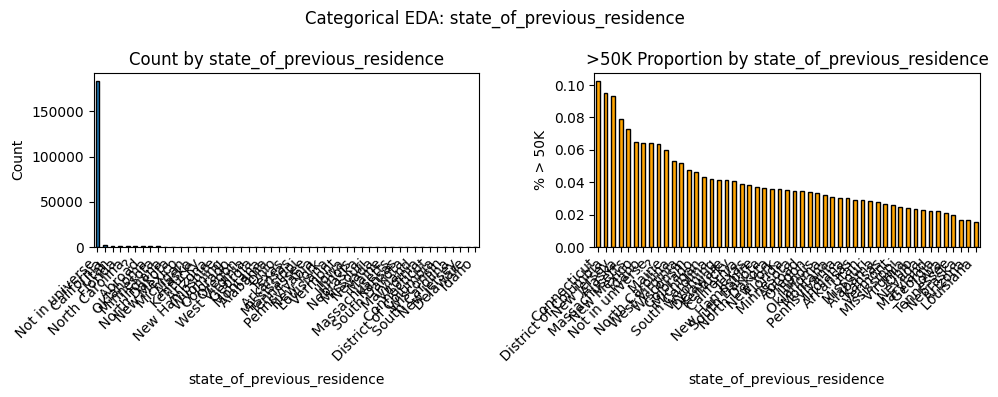

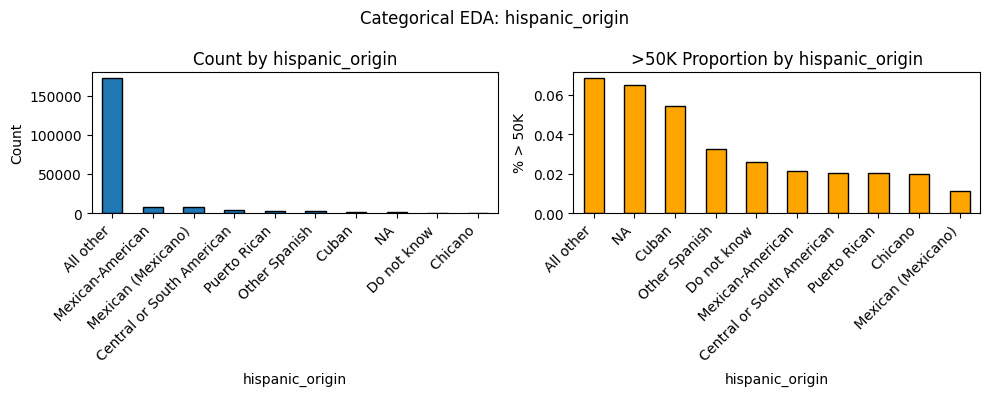

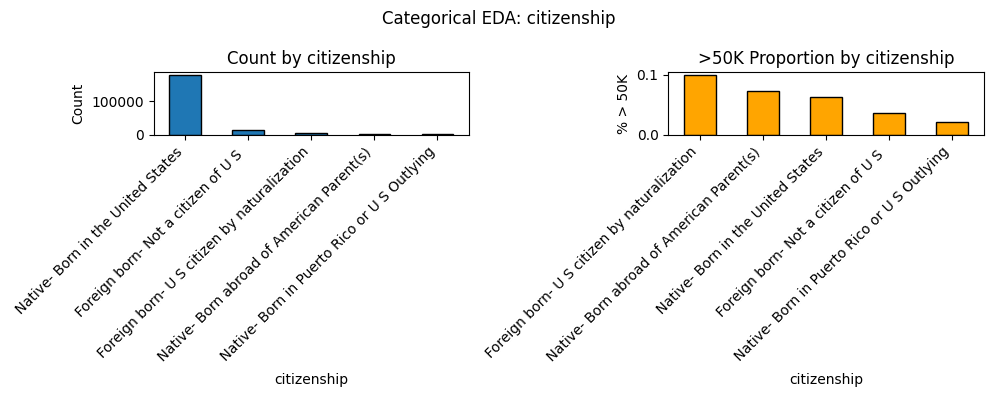

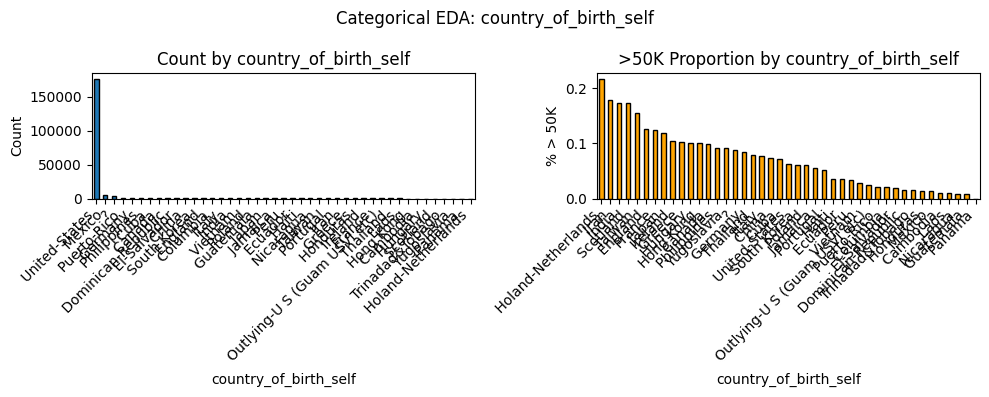

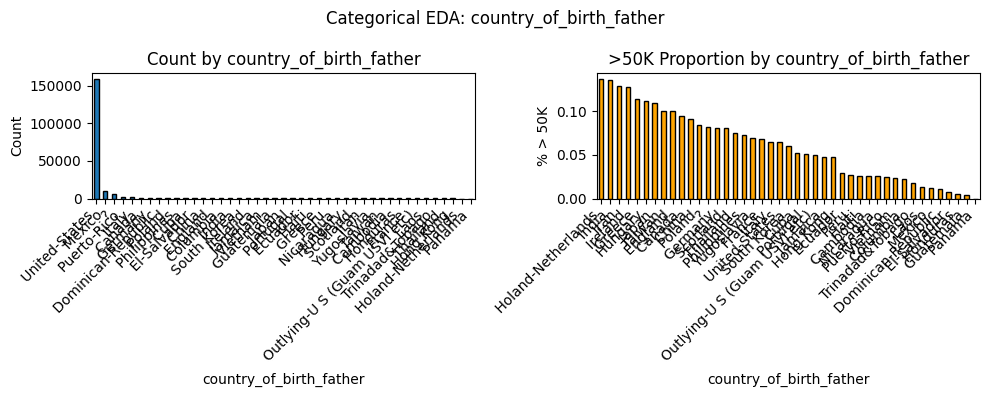

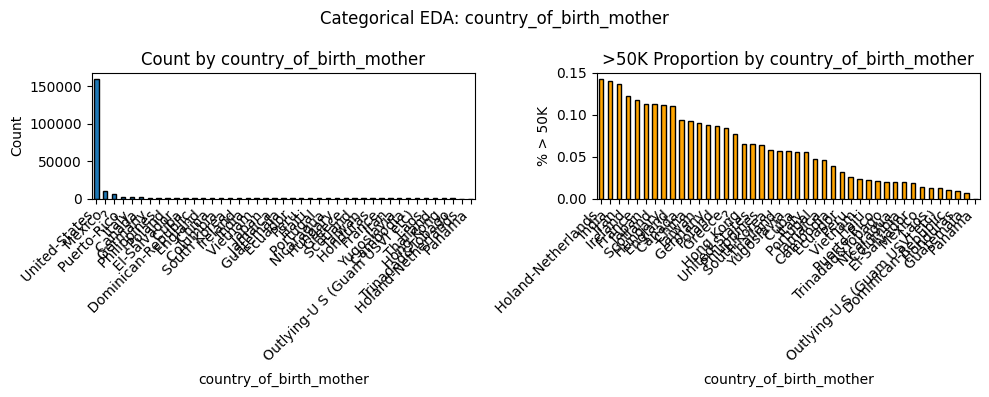

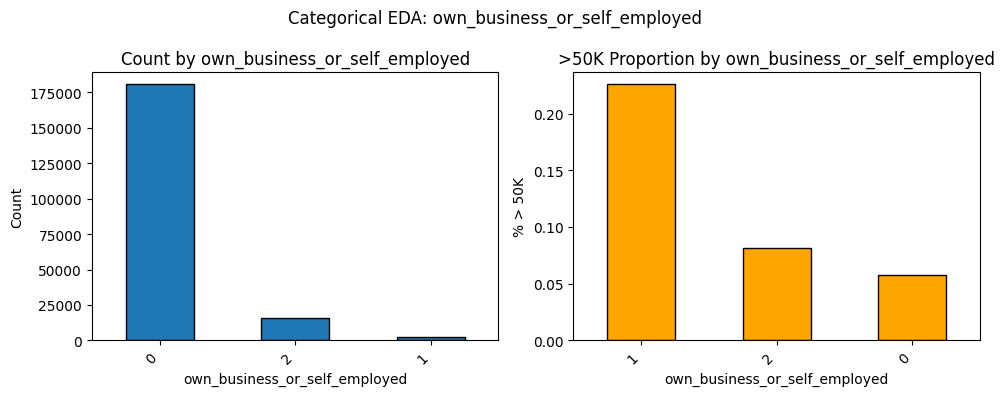

[WARNING] Column 'fill_inc_questionnaire_for_veteran_admin' not in DataFrame.


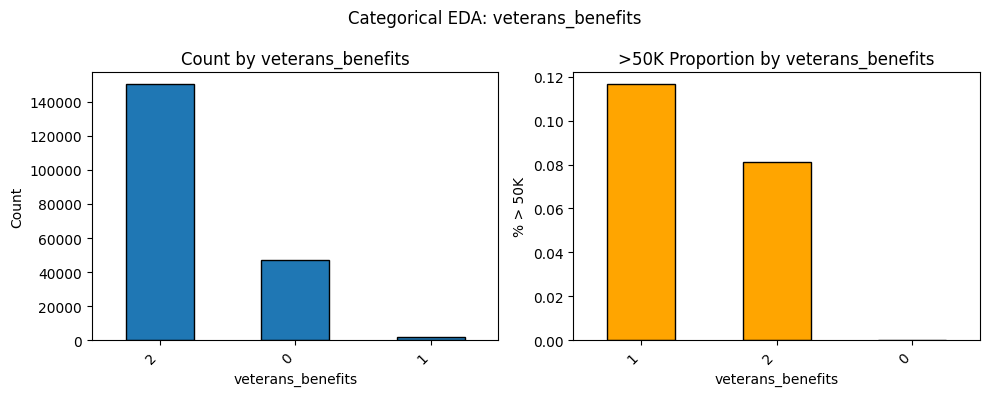

In [114]:
plot_categorical_eda(household_cols, 'Household')
plot_categorical_eda(education_work_cols, 'Education & Work')
plot_categorical_eda(migration_cols, 'Migration')
plot_categorical_eda(demographic_cols, 'Demographic')
plot_categorical_eda(veteran_cols, 'Veteran')

Key Findings from Categorical EDA:

Household & Family
 - Householder and spouse of householder show higher likelihood of earning >50K
 - Family members under 18 rarely earn >50K, with small exceptions when both parents 
 - or mother only is present
 - Owning a business correlates with higher earning potential

Education & Employment 
 - Most high earners are employed, though some unemployed also earn >50K
 - Currently enrolled in education shows expected pattern, though some high earners
 - pursue additional education
 - Certain industries (mining, professional services, armed forces) have higher
 - proportion of >50K earners

Geographic Mobility
 - Living in same house 1 year ago shows no clear relationship with income
 - Non-movers within MSAs tend to earn more
 - Regional migration (especially East to West) shows some correlation with higher
   earnings, though sample size is small

Demographics
 - State of residence shows significant effect on income levels
 - Parents' country of birth shows systematic patterns
 - Hispanic origin shows no clear relationship
 - Veteran benefits associate with increased earning potential

### Plot.ly Visualization Package

In [ ]:
# Global color settings
COLOR_MAP = {'-50000': 'royalblue', '50000+': 'lightblue'}
DEFAULT_COLOR_SCALE = 'Blues'

In [131]:
def clean_feature_names(features: pd.Series) -> pd.Series:
    return (
        features.str.replace('major_occupation_code_', 'Occupation: ', regex=False)
                .str.replace('major_industry_code_', 'Industry: ', regex=False)
                .str.replace('class_of_worker_', 'Worker Class: ', regex=False)
                .str.replace('age_group_', 'Age: ', regex=False)
                .str.replace('detailed_household_and_family_stat_', 'Household: ', regex=False)
                .str.replace('full_or_part_time_employment_stat_', 'Employment: ', regex=False)
                .str.replace('state_of_previous_residence_', 'Prev State: ', regex=False)
                .str.replace('region_of_previous_residence_', 'Prev Region: ', regex=False)
                .str.replace('hispanic_origin_', 'Hispanic Origin: ', regex=False)
                .str.replace('_', ' ', regex=False)  # replace underscores with spaces
                .str.title()                         # make it title case for readability
    )

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Global color map
COLOR_MAP = {'-50000': 'royalblue', '50000+': 'lightblue'}

# Utility: Clean feature names
def clean_feature_name(name: str) -> str:
    """Convert technical feature names into human-friendly labels."""
    return (
        name.replace('major_occupation_code_', 'Occupation: ')
            .replace('major_industry_code_', 'Industry: ')
            .replace('class_of_worker_', 'Worker Class: ')
            .replace('age_group_', 'Age: ')
            .replace('owns_business', 'Owns Business')
            .replace('is_filer', 'Filed Taxes')
            .replace('full_or_part_time_employment_stat_', 'Employment: ')
            .replace('detailed_household_and_family_stat_', 'Household: ')
            .replace('state_of_previous_residence_', 'Prev State: ')
            .replace('region_of_previous_residence_', 'Prev Region: ')
            .replace('hispanic_origin_', 'Hispanic Origin: ')
            .replace('_', ' ')
            .title()
    )

# Continuous Features
def plot_continuous_distribution(df, columns, target_col='income_level', output_dir='eda_plots/continuous'):
    os.makedirs(output_dir, exist_ok=True)
    for col in columns:
        if col not in df.columns:
            continue

        clean_col = clean_feature_name(col)
        
        fig = px.histogram(
            df, x=col, color=target_col, nbins=50, 
            marginal="box", 
            color_discrete_map=COLOR_MAP,
            title=f'{clean_col} Distribution by {target_col}'
        )
        fig.update_layout(
            bargap=0.1,
            xaxis_title=clean_col,
            yaxis_title='Count'
        )
        
        # Save with clean name in file name
        safe_name = clean_col.replace(" ", "_").replace(":", "")
        fig.write_html(f"{output_dir}/{safe_name}_by_income.html")

# Categorical Features with Overlay 
def plot_categorical_distribution_overlay(df, columns, target_col='income_level', output_dir='eda_plots/categorical'):
    os.makedirs(output_dir, exist_ok=True)

    for col in columns:
        if col not in df.columns:
            continue

        clean_df = df[[col, target_col]].dropna()
        clean_df[target_col] = clean_df[target_col].astype(str).str.strip()

        # Count and proportion
        count_df = clean_df.groupby([col, target_col]).size().reset_index(name='count')
        prop_df = (
            clean_df.groupby(col)[target_col]
            .apply(lambda x: (x == '50000+').mean())
            .reset_index(name='percent_gt_50k')
        )

        order = clean_df[col].value_counts().index.tolist()
        count_df[col] = pd.Categorical(count_df[col], categories=order, ordered=True)
        prop_df[col] = pd.Categorical(prop_df[col], categories=order, ordered=True)

        clean_col = clean_feature_name(col)
        fig = go.Figure()

        # Stacked bars with color map
        for level in clean_df[target_col].unique():
            temp = count_df[count_df[target_col] == level]
            fig.add_trace(go.Bar(
                x=temp[col], y=temp['count'], name=f'Count: {level}',
                marker_color=COLOR_MAP.get(level, 'grey'),
                yaxis='y1'
            ))

        # Scatter points for proportion
        fig.add_trace(go.Scatter(
            x=prop_df[col], y=prop_df['percent_gt_50k'],
            name='% >50K', mode='markers',
            marker=dict(color='black', size=8), yaxis='y2'
        ))

        fig.update_layout(
            title=f'{clean_col}: Counts and % >50K',
            xaxis=dict(title=clean_col, categoryorder='array', categoryarray=order),
            yaxis=dict(title='Count'),
            yaxis2=dict(title='% >50K', overlaying='y', side='right', tickformat='.0%'),
            barmode='stack'
        )

        # Save with clean name in file name
        safe_name = clean_col.replace(" ", "_").replace(":", "")
        fig.write_html(f"{output_dir}/{safe_name}_overlay_by_income.html")

# Master Function
def generate_eda_plotly_package(df, continuous_cols, categorical_cols, target_col='income_level'):
    plot_continuous_distribution(df, continuous_cols, target_col)
    plot_categorical_distribution_overlay(df, categorical_cols, target_col)
    print("EDA plots saved to: eda_plots/ (HTML format)")

In [ ]:
continuous_cols = [
    'age', 'wage_per_hour', 'capital_gains', 'capital_losses',
    'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year'
]

categorical_cols = income_markers + household_cols + education_work_cols + migration_cols + demographic_cols + veteran_cols

generate_eda_plotly_package(train_df, continuous_cols, categorical_cols)

In [ ]:
fig = px.histogram(
    train_df,
    x='income_level',
    color='income_level',
    title='Income Level Distribution',
    color_discrete_map=COLOR_MAP  # <-- apply custom color scheme
)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
from pptx import Presentation
from pptx.util import Inches, Pt

COLOR_MAP = {'-50000': 'royalblue', '50000+': 'lightblue'}

# Utility: Clean feature names
def clean_feature_name(name: str) -> str:
    return (
        name.replace('major_occupation_code_', 'Occupation: ')
            .replace('major_industry_code_', 'Industry: ')
            .replace('class_of_worker_', 'Worker Class: ')
            .replace('age_group_', 'Age: ')
            .replace('owns_business', 'Owns Business')
            .replace('is_filer', 'Filed Taxes')
            .replace('full_or_part_time_employment_stat_', 'Employment: ')
            .replace('detailed_household_and_family_stat_', 'Household: ')
            .replace('state_of_previous_residence_', 'Prev State: ')
            .replace('region_of_previous_residence_', 'Prev Region: ')
            .replace('hispanic_origin_', 'Hispanic Origin: ')
            .replace('_', ' ')
            .title()
    )

# Save Plotly figure to both HTML and PNG
def save_plot(fig, output_dir, filename_base):
    html_path = os.path.join(output_dir, f"{filename_base}.html")
    png_path = os.path.join(output_dir, f"{filename_base}.png")
    fig.write_html(html_path)
    fig.write_image(png_path, width=1200, height=800)
    return png_path

# Continuous features
def plot_continuous_distribution(df, columns, target_col='income_level', output_dir='eda_plots/continuous'):
    os.makedirs(output_dir, exist_ok=True)
    image_paths = []
    for col in columns:
        if col not in df.columns:
            continue

        clean_col = clean_feature_name(col)
        
        fig = px.histogram(
            df, x=col, color=target_col, nbins=50, 
            marginal="box", 
            color_discrete_map=COLOR_MAP,
            title=f'{clean_col} Distribution by {target_col}'
        )
        fig.update_layout(
            bargap=0.1,
            xaxis_title=clean_col,
            yaxis_title='Count'
        )
        
        safe_name = clean_col.replace(" ", "_").replace(":", "")
        img_path = save_plot(fig, output_dir, f"{safe_name}_by_income")
        image_paths.append((clean_col, img_path))
    return image_paths

# Categorical features
def plot_categorical_distribution_overlay(df, columns, target_col='income_level', output_dir='eda_plots/categorical'):
    os.makedirs(output_dir, exist_ok=True)
    image_paths = []

    for col in columns:
        if col not in df.columns:
            continue

        clean_df = df[[col, target_col]].dropna()
        clean_df[target_col] = clean_df[target_col].astype(str).str.strip()

        count_df = clean_df.groupby([col, target_col]).size().reset_index(name='count')
        prop_df = (
            clean_df.groupby(col)[target_col]
            .apply(lambda x: (x == '50000+').mean())
            .reset_index(name='percent_gt_50k')
        )

        order = clean_df[col].value_counts().index.tolist()
        count_df[col] = pd.Categorical(count_df[col], categories=order, ordered=True)
        prop_df[col] = pd.Categorical(prop_df[col], categories=order, ordered=True)

        clean_col = clean_feature_name(col)
        fig = go.Figure()

        # Stacked bars
        for level in clean_df[target_col].unique():
            temp = count_df[count_df[target_col] == level]
            fig.add_trace(go.Bar(
                x=temp[col], y=temp['count'], name=f'Count: {level}',
                marker_color=COLOR_MAP.get(level, 'grey'),
                yaxis='y1'
            ))

        # % >50K markers
        fig.add_trace(go.Scatter(
            x=prop_df[col], y=prop_df['percent_gt_50k'],
            name='% >50K', mode='markers',
            marker=dict(color='black', size=8), yaxis='y2'
        ))

        fig.update_layout(
            title=f'{clean_col}: Counts and % >50K',
            xaxis=dict(title=clean_col, categoryorder='array', categoryarray=order),
            yaxis=dict(title='Count'),
            yaxis2=dict(title='% >50K', overlaying='y', side='right', tickformat='.0%'),
            barmode='stack'
        )

        safe_name = clean_col.replace(" ", "_").replace(":", "")
        img_path = save_plot(fig, output_dir, f"{safe_name}_overlay_by_income")
        image_paths.append((clean_col, img_path))
    return image_paths

# Master function with PPT export
def generate_eda_plotly_package(df, continuous_cols, categorical_cols, target_col='income_level', pptx_filename='EDA_Presentation.pptx'):
    cont_imgs = plot_continuous_distribution(df, continuous_cols, target_col)
    cat_imgs = plot_categorical_distribution_overlay(df, categorical_cols, target_col)
    
    # Combine all plots
    all_imgs = cont_imgs + cat_imgs
    
    # Create PowerPoint
    prs = Presentation()
    # Title slide
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = "EDA: Income Level Analysis"
    slide.placeholders[1].text = "Distributions and Insights for Continuous and Categorical Variables"

    for title, img_path in all_imgs:
        slide = prs.slides.add_slide(prs.slide_layouts[5])
        title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
        title_frame = title_box.text_frame
        title_frame.text = title
        title_frame.paragraphs[0].font.size = Pt(24)
        title_frame.paragraphs[0].font.bold = True
        
        slide.shapes.add_picture(img_path, Inches(0.5), Inches(1.2), width=Inches(9))

    pptx_path = os.path.join('eda_plots', pptx_filename)
    prs.save(pptx_path)
    print(f"EDA plots and PowerPoint saved at {pptx_path}")
    return pptx_path

In [ ]:
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65+']
train_df['age_group'] = pd.cut(train_df['age'], bins=age_bins, labels=age_labels, right=False)
train_df['age_group'] = train_df['age_group'].astype(str)

test_df['age_group'] = pd.cut(test_df['age'], bins=age_bins, labels=age_labels, right=False)
test_df['age_group'] = test_df['age_group'].astype(str)

In [ ]:
# Pivot the data
pivot = train_df.pivot_table(
    index='major_occupation_code', 
    columns='age_group', 
    values='income_level', 
    aggfunc=lambda x: (x == '50000+').mean()
)

# Sort by highest average %>50K
pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]

# Create heatmap
fig = px.imshow(
    pivot,
    text_auto='.0%',
    color_continuous_scale='Blues',
    aspect='auto',  # automatic sizing
    title='% >50K by Occupation and Age Group'
)

# Better layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Occupation',
    xaxis=dict(side='top', tickangle=0),
    coloraxis_colorbar=dict(title='% >50K')
)

fig.show()

### Feature Engineering

Feature Engineering Based on EDA

Convert:
- education to ordinal
- marital_status to ordinal or grouped categories
- class_of_worker, major_occupation_code → one-hot or reduced categories

Create:
- Binary flags: is_filer, in_labor_union, is_married, has_degree, etc.
- Optionally: interaction terms like education × sex, occupation × marital_status for boosted models

- Optional: combine education and tax_filer_status into a single feature for linear models

In [115]:
#Target variable was cleaned above 

train_df['income_level'] = (
    train_df['income_level']
    .str.replace('.', '', regex=False)
    .astype(str)          # ensure string
    .str.strip()          # remove leading/trailing spaces
    .str.replace(' ', '', regex=False)  # remove inner spaces
)

test_df['income_level'] = (
    test_df['income_level']
    .str.replace('.', '', regex=False)
    .astype(str)          # ensure string
    .str.strip()          # remove leading/trailing spaces
    .str.replace(' ', '', regex=False)  # remove inner spaces
)

def clean_raw_dataframe(df):
    df = df.copy()
    
    # Strip whitespace
    df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
    
    # Replace 'Not in universe' and '?' with NaN
    df.replace({'Not in universe': np.nan, '?': np.nan}, inplace=True)
    
    # Optional: Fill NaNs with default values or use imputation later
    df.fillna('Unknown', inplace=True)  # or 0 or use sklearn.impute

    return df

In [116]:
train_df = clean_raw_dataframe(train_df)
test_df = clean_raw_dataframe(test_df)

/var/folders/qq/409tt1nx21x2d1fr7mc7t8xm0000gn/T/ipykernel_6961/3694605674.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


In [117]:
#bin state of residence in top 10 

top_k = train_df['state_of_previous_residence'].value_counts().nlargest(10).index
train_df['state_of_previous_residence'] = train_df['state_of_previous_residence'].apply(
    lambda x: x if x in top_k else 'Other'
)
test_df['state_of_previous_residence'] = test_df['state_of_previous_residence'].apply(
    lambda x: x if x in top_k else 'Other'
)

In [118]:
def prepare_features(train_df):
    df = train_df.copy()

    # --- Clean strings and placeholders ---
    df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
    df.replace({'Not in universe': 'Unknown', '?': 'Unknown'}, inplace=True)

    # --- Drop irrelevant or bias-prone features ---
    drop_cols = [
        'sex', 'race',
        'migration_code_change_in_msa',
        'migration_code_change_in_reg',
        'migration_code_move_within_reg',
        'live_in_this_house_1_year_ago',
        'migration_prev_res_in_sunbelt',
        'fill_inc_questionnaire_for_veteran_admin',
        'detailed_occupation_recode',
        'detailed_industry_recode',
        'country_of_birth_father',
        'country_of_birth_mother',
        'instance_weight'
    ]
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    # --- Binary flags ---
    df['has_capital_gain'] = df['capital_gains'].astype(float) > 0
    df['has_capital_loss'] = df['capital_losses'].astype(float) > 0
    df['has_dividends'] = df['dividends_from_stocks'].astype(float) > 0
    df['owns_business'] = df['own_business_or_self_employed'].astype(str) == '1'
    df['receives_veteran_benefits'] = df['veterans_benefits'].astype(str) == '1'
    df['is_filer'] = df['tax_filer_status'].str.lower().str.contains('joint')
    df['us_born'] = df['country_of_birth_self'].str.strip() == 'United-States'

    # --- Log-transformed magnitude features ---
    df['log_capital_gains'] = np.where(df['has_capital_gain'], np.log1p(df['capital_gains'].astype(float)), 0)
    df['log_capital_losses'] = np.where(df['has_capital_loss'], np.log1p(df['capital_losses'].astype(float)), 0)
    df['log_dividends'] = np.where(df['has_dividends'], np.log1p(df['dividends_from_stocks'].astype(float)), 0)

    # --- Ordinal encodings ---
    edu_order = {
        'Children': 0, 'Less than 1st grade': 1, '1st 2nd 3rd or 4th grade': 2,
        '5th or 6th grade': 3, '7th and 8th grade': 4, '9th grade': 5,
        '10th grade': 6, '11th grade': 7, '12th grade no diploma': 8,
        'High school graduate': 9, 'Some college but no degree': 10,
        'Associates degree-occup /vocational': 11,
        'Associates degree-academic program': 12,
        'Bachelors degree(BA AB BS)': 13,
        'Masters degree(MA MS MEng MEd MSW MBA)': 14,
        'Prof school degree (MD DDS DVM LLB JD)': 15,
        'Doctorate degree(PhD EdD)': 16
    }
    df['education_level'] = df['education'].map(edu_order).fillna(-1).astype(int)

    marital_order = {
        'Never married': 0,
        'Separated': 1,
        'Widowed': 2,
        'Divorced': 3,
        'Married-spouse absent': 4,
        'Married-civilian spouse present': 5,
        'Married-A F spouse present': 6
    }
    df['marital_status_code'] = df['marital_status'].map(marital_order).fillna(-1).astype(int)

    # --- Drop original columns that were encoded or transformed ---
    to_drop = [
        'education', 'marital_status',
        'capital_gains', 'capital_losses', 'dividends_from_stocks',
        'own_business_or_self_employed', 'veterans_benefits',
        'tax_filer_status', 'country_of_birth_self'
    ]
    df.drop(columns=[col for col in to_drop if col in df.columns], inplace=True)

    age_bins = [0, 25, 35, 45, 55, 65, 100]
    age_labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
    df['age_group'] = df['age_group'].astype(str)

    # --- One-hot encode remaining object columns ---
    obj_cols = df.select_dtypes(include='object').columns.tolist()
    if 'income_level' in obj_cols:
        obj_cols.remove('income_level')  # don't encode the target
    df = pd.get_dummies(df, columns=obj_cols, drop_first=True)

    if 'age' in df.columns:
        df.drop(columns=['age'], inplace=True)

    # --- Preserve target column ---
    if 'income_level' in train_df.columns:
        df['income_level'] = train_df['income_level'].str.replace('.', '', regex=False).values

    return df

In [119]:
train_df_processed = prepare_features(train_df)
test_df_processed = prepare_features(test_df)

/var/folders/qq/409tt1nx21x2d1fr7mc7t8xm0000gn/T/ipykernel_6961/2694467699.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
/var/folders/qq/409tt1nx21x2d1fr7mc7t8xm0000gn/T/ipykernel_6961/2694467699.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


### Model

#### Logistic Regression 

##### Iteraiton 1

/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.99      0.84      0.91     93576
        >50K       0.27      0.89      0.41      6186

    accuracy                           0.84     99762
   macro avg       0.63      0.86      0.66     99762
weighted avg       0.95      0.84      0.88     99762

Confusion Matrix:
[[78344 15232]
 [  685  5501]]
ROC-AUC Score: 0.9388946591847203
PR-AUC Score: 0.5708959982955402


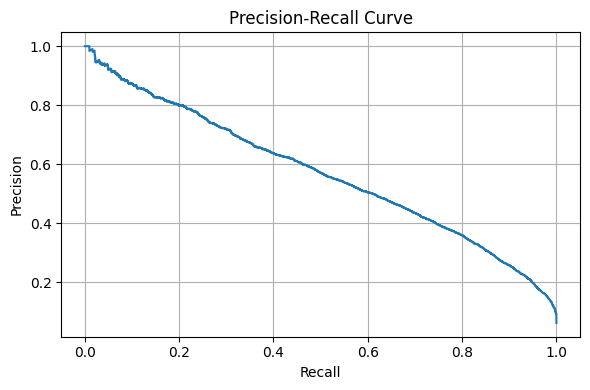

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt

# Step 1: Separate target (if not already separated)
target_col = 'income_level'
X_train = train_df_processed.drop(columns=target_col)
X_test = test_df_processed.drop(columns=target_col)

# Step 2: Align test columns to match train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 3: Reattach target #handle this earlier 
y_train = train_df_processed[target_col].str.strip().map({'-50000': 0, '50000+': 1})
y_test = test_df_processed[target_col].str.strip().map({'-50000': 0, '50000+': 1})

# STEP 4: Train Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# STEP 5: Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# STEP 6: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))

# STEP 7: Plot PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

| Metric | Score | Comment |
|--------|--------|---------|
| Accuracy | 84% | High, but inflated by majority class (<=50K) |
| Precision (>50K) | 27% | Low — many false positives |
| Recall (>50K) | 89% | Excellent — very few missed high earners |
| F1-score (>50K) | 41% | Balanced view — reflects tradeoff |
| ROC AUC | 0.94 | Strong overall class separation |
| PR AUC | 0.57 | Moderate — better than random baseline (~0.06) |

The model is doing a great job identifying high earners (high recall), but at the cost of mistakenly labeling too many as such (low precision). This is expected with `class_weight='balanced'` in imbalanced datasets — it biases toward recall of the minority class.



##### Iteration 2

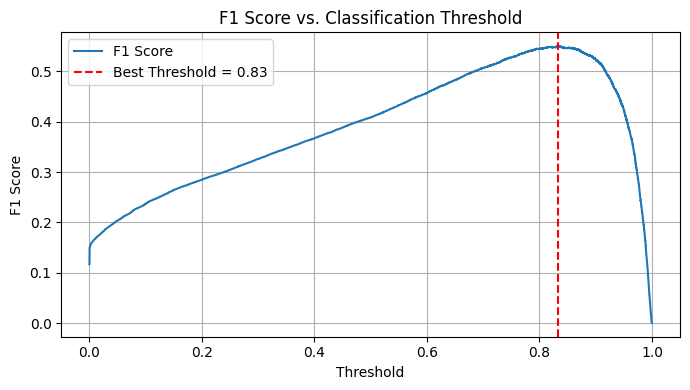

Best Threshold: 0.833
Best F1 Score: 0.55

Classification Report (Tuned Threshold):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     93576
           1       0.50      0.61      0.55      6186

    accuracy                           0.94     99762
   macro avg       0.74      0.79      0.76     99762
weighted avg       0.94      0.94      0.94     99762

Confusion Matrix:
[[89751  3825]
 [ 2387  3799]]


In [121]:
# Optimizing classification threshold to maximize F1-score (previous cell used default 0.5 threshold)
# Step 1: Predict probabilities for the >50K class
y_scores = model.predict_proba(X_test)[:, 1]

# Step 2: Compute precision-recall pairs and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # avoid divide-by-zero

# Step 3: Find best threshold (maximize F1)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Step 4: Plot F1 score vs threshold
plt.figure(figsize=(7, 4))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Classification Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Reclassify using best threshold
y_pred_tuned = (y_scores >= best_threshold).astype(int)

# Step 6: Print evaluation metrics
print("Best Threshold:", round(best_threshold, 3))
print("Best F1 Score:", round(best_f1, 3))
print("\nClassification Report (Tuned Threshold):")
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Model Performance Analysis:

1. Threshold Optimization:
   - Best classification threshold found at 0.833
   - Achieved F1 score of 0.55 for income $50K+

2. Class-wise Performance:
   - Income less than -$50K (0):
     - Very high precision (0.97) and recall (0.96)
     - Excellent F1-score of 0.97
     - Model correctly identifies most low income cases
   
   - High Income Class (1): 
     - Moderate precision (0.50) - half of predicted high incomes are correct
     - Good recall (0.61) - captures 61% of actual high income cases
     - F1-score of 0.55 shows balanced but moderate performance

3. Overall Metrics:
   - High accuracy (0.94) but influenced by class imbalance
   - Macro average F1 of 0.76 shows decent performance across classes
   - Confusion matrix shows:
     - 89,751 true negatives (correctly predicted low income)
     - 3,799 true positives (correctly predicted high income)
     - 3,825 false positives (incorrectly predicted high income)
     - 2,387 false negatives (missed high income cases)

In [122]:
coefs = pd.Series(model.coef_[0], index=X_train.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)
coefs_sorted.head(20)  # Top influencing features

major_occupation_code_Executive admin and managerial         1.452080
major_occupation_code_Professional specialty                 1.171497
age_group_65+                                                1.148291
major_occupation_code_Sales                                  1.129917
major_occupation_code_Protective services                    1.114740
major_industry_code_Social services                         -0.948192
age_group_55–64                                              0.899383
owns_business                                                0.868685
class_of_worker_Self-employed-incorporated                   0.858991
age_group_45–54                                              0.839819
has_capital_gain                                            -0.807287
major_industry_code_Education                               -0.801885
has_dividends                                               -0.686221
major_occupation_code_Technicians and related support        0.685808
age_group_<25       

In [123]:
odds_ratios = coefs_sorted.apply(lambda x: round(np.exp(x), 2))
odds_ratios.head(20)

major_occupation_code_Executive admin and managerial         4.27
major_occupation_code_Professional specialty                 3.23
age_group_65+                                                3.15
major_occupation_code_Sales                                  3.10
major_occupation_code_Protective services                    3.05
major_industry_code_Social services                          0.39
age_group_55–64                                              2.46
owns_business                                                2.38
class_of_worker_Self-employed-incorporated                   2.36
age_group_45–54                                              2.32
has_capital_gain                                             0.45
major_industry_code_Education                                0.45
has_dividends                                                0.50
major_occupation_code_Technicians and related support        1.99
age_group_<25                                                0.51
is_filer  

| Feature | Odds Ratio | Compared To | Interpretation |
|---------|------------|-------------|----------------|
| major_occupation_code_Executive admin and managerial | 4.27 | Handlers, equipment cleaners, etc. | Exec/admin roles are 4.27× more likely to earn >50K than handlers/equipment cleaners. |
| major_occupation_code_Professional specialty | 3.23 | Handlers, equipment cleaners, etc. | Professional specialists are 3.23× more likely to earn >50K than handlers. |
| age_group_65+ | 3.15 | Age group <25 | People 65+ are 3.15× more likely to earn >50K than those under 25. |
| major_occupation_code_Sales | 3.10 | Handlers, equipment cleaners, etc. | Sales roles are 3.10× more likely to earn >50K than handlers. |
| major_occupation_code_Protective services | 3.05 | Handlers, equipment cleaners, etc. | Protective services workers are 3.05× more likely to earn >50K than handlers. |
| major_industry_code_Social services | 0.39 | Other industry category (dropped) | Social service workers are 61% less likely to earn >50K than other industry workers. |
| age_group_55-64 | 2.46 | Age group <25 | People aged 55-64 are 2.46× more likely to earn >50K than those under 25. |
| owns_business | 2.38 | Does not own business | Owning a business increases likelihood of >50K income by 2.38× vs. not owning. |
| class_of_worker_Self-employed-incorporated | 2.36 | Private sector employee | Self-employed (inc.) individuals are 2.36× more likely to earn >50K than private employees. |
| age_group_45-54 | 2.32 | Age group <25 | Ages 45-54 are 2.32× more likely to earn >50K than those under 25. |

Education doesn't appear in top 10 coefficients

Reasons:
1. One-hot encoding spreads education's influence across multiple columns
   - No single dominant education value emerges
   - Impact is distributed rather than concentrated

2. Reference category effect
   - All education levels are compared to base/reference category
   - Individual coefficients show relative rather than absolute impact

3. Feature correlation
   - Education's predictive power is shared with correlated features
   - Occupation, age, and other variables capture some education signal

Solution:
- SHAP values or feature grouping provide better insight
- These methods can show education's true grouped categorical influence
- More appropriate for understanding education's overall impact


In [124]:
#has_dividends and has_capital_gains is negative which is against intuitive thinking for high income earners
# this may be due to the presence of log transformed versions of these sparse variables 
#VIF will help diagnose multi collinearity and accordingly rerun iteration by removing these flags and only keeping log transformed values 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select numeric columns only (VIF only works with numeric input)
X_numeric = X_train.select_dtypes(include=[float, int])

# Step 2: Add constant/intercept term for VIF calculation
X_vif = add_constant(X_numeric)

# Step 3: Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Step 4: Drop constant and sort
vif_data = vif_data[vif_data["Feature"] != "const"].sort_values(by="VIF", ascending=False)

# Step 5: View results
print(vif_data.head(20))  # or display entire DataFrame

                           Feature       VIF
3             weeks_worked_in_year  2.713703
2  num_persons_worked_for_employer  2.342775
8                  education_level  2.120868
9              marital_status_code  1.514944
7                    log_dividends  1.111427
1                    wage_per_hour  1.045440
5                log_capital_gains  1.040962
6               log_capital_losses  1.019297
4                             year  1.000576


##### Iteration 3 // Final Model Chosen 

In [125]:
#features like dividends and capital gains still behave counterintuitively (like has_dividends being negative), it’s likely due to data sparsity, interactions, or overlap with stronger features — not collinearity as per VIF

#new model iteration 

# Step 1: Drop the binary "has_" features from your training and test sets
features_to_drop = ['has_dividends', 'has_capital_gain']  # Add others if needed

X_train_reduced = X_train.drop(columns=features_to_drop, errors='ignore')
X_test_reduced = X_test.drop(columns=features_to_drop, errors='ignore')

# Step 2: Re-train logistic regression
from sklearn.linear_model import LogisticRegression

model_reduced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_reduced.fit(X_train_reduced, y_train)

# Step 3: Predict probabilities and optimize threshold (if previously done)
y_proba_reduced = model_reduced.predict_proba(X_test_reduced)[:, 1]

# Step 4: Evaluate at previous optimal threshold or use 0.5 default
threshold = 0.833  # or find new best using precision_recall_curve
y_pred_reduced = (y_proba_reduced >= threshold).astype(int)

# Step 5: Print performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print("Classification Report:")
print(classification_report(y_test, y_pred_reduced))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_reduced))
print("PR-AUC Score:", average_precision_score(y_test, y_proba_reduced))

#To improve interpretability and reduce multicollinearity, we removed binary indicators like has_dividends and has_capital_gain in favor of log-transformed versions. This led to a simpler model with no performance degradation and more intuitive coefficient behavior.”

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     93576
           1       0.49      0.62      0.55      6186

    accuracy                           0.94     99762
   macro avg       0.73      0.79      0.76     99762
weighted avg       0.94      0.94      0.94     99762

Confusion Matrix:
[[89590  3986]
 [ 2374  3812]]
ROC-AUC Score: 0.9383676070455695
PR-AUC Score: 0.5638690906738413


/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-	No loss in performance, and some stability improvements.
-	This suggests that the has_ features were redundant — possibly even introducing noise or conflicting signals.
-	Removing them simplifies the model and improves interpretability (fewer surprises in sign/direction).


Model Performance Summary:
- High overall accuracy (94%) but imbalanced performance between classes
- For majority class (0):
  - Very good precision (97%) and recall (96%)
- For minority class (1): 
  - Lower precision (49%) but moderate recall (62%)
- Strong ROC-AUC score of 0.94 indicates good discrimination ability
- PR-AUC of 0.56 reflects challenges with class imbalance
- Confusion matrix shows:
  - True Negatives: 89,590
  - False Positives: 3,986 
  - False Negatives: 2,374
  - True Positives: 3,812


In [126]:
coefs = pd.Series(model_reduced.coef_[0], index=X_train_reduced.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)
coefs_sorted.head(20)  # Top influencing features

major_occupation_code_Executive admin and managerial         1.426011
major_occupation_code_Professional specialty                 1.254504
age_group_65+                                                1.249417
major_occupation_code_Sales                                  1.199158
major_occupation_code_Protective services                    1.124732
major_industry_code_Social services                         -0.960787
age_group_55–64                                              0.955957
class_of_worker_Self-employed-incorporated                   0.909334
owns_business                                                0.907655
age_group_45–54                                              0.869581
major_industry_code_Education                               -0.853692
is_filer                                                     0.735832
age_group_<25                                               -0.717736
class_of_worker_State government                            -0.701522
major_occupation_cod

While working in education or social services alone reduces the odds of high income, combining that with owning a business or holding an executive/professional role dramatically boosts income potential

- Logistic regression is linear, but additive — so combinations of strong signals can override weak/negative ones.
- Coefficient direction is not absolute — it’s conditional on other features being held constant.
- The model captures real-world nuance: educators or social workers don’t often make >$50K, unless they’re also business owners, executives, or seasoned professionals.

In [127]:
odds_ratios = coefs_sorted.apply(lambda x: round(np.exp(x), 2))
odds_ratios.head(20)

major_occupation_code_Executive admin and managerial         4.16
major_occupation_code_Professional specialty                 3.51
age_group_65+                                                3.49
major_occupation_code_Sales                                  3.32
major_occupation_code_Protective services                    3.08
major_industry_code_Social services                          0.38
age_group_55–64                                              2.60
class_of_worker_Self-employed-incorporated                   2.48
owns_business                                                2.48
age_group_45–54                                              2.39
major_industry_code_Education                                0.43
is_filer                                                     2.09
age_group_<25                                                0.49
class_of_worker_State government                             0.50
major_occupation_code_Precision production craft & repair    1.96
major_occu

In [128]:
# Start with a zeroed input
base_input = pd.DataFrame([np.zeros(X_train_reduced.shape[1])], columns=X_train_reduced.columns)

# Person A: Works in education only
person_a = base_input.copy()
person_a['major_industry_code_Education'] = 1
# other features (e.g., age, occupation, filing status) remain baseline

# Person B: Works in education + owns a business
person_b = person_a.copy()
person_b['owns_business'] = 1

# Predict probabilities
prob_a = model_reduced.predict_proba(person_a)[0, 1]
prob_b = model_reduced.predict_proba(person_b)[0, 1]

print(f"Person A (Education only): Probability of >50K = {prob_a:.4f}")
print(f"Person B (Education + Owns Business): Probability of >50K = {prob_b:.4f}")
print(f"Increase from owning business: {(prob_b - prob_a):.4f}")

Person A (Education only): Probability of >50K = 0.2980
Person B (Education + Owns Business): Probability of >50K = 0.5127
Increase from owning business: 0.2147


In [129]:

# Start with a zeroed input
base_input = pd.DataFrame([np.zeros(X_train_reduced.shape[1])], columns=X_train_reduced.columns)

# Person C: Works in Social Services only
person_c = base_input.copy()
person_c['major_industry_code_Social services'] = 1
# Other features remain baseline (0)

# Person D: Works in Social Services + owns a business
person_d = person_c.copy()
person_d['owns_business'] = 1

# Predict probabilities
prob_c = model_reduced.predict_proba(person_c)[0, 1]
prob_d = model_reduced.predict_proba(person_d)[0, 1]

print(f"Person C (Social Services only): Probability of >50K = {prob_c:.4f}")
print(f"Person D (Social Services + Owns Business): Probability of >50K = {prob_d:.4f}")
print(f"Increase from owning business: {(prob_d - prob_c):.4f}")

Person C (Social Services only): Probability of >50K = 0.2761
Person D (Social Services + Owns Business): Probability of >50K = 0.4860
Increase from owning business: 0.2098


In [132]:
def clean_feature_names(features: pd.Series) -> pd.Series:
    return (
        features.str.replace('major_occupation_code_', 'Occupation: ', regex=False)
                .str.replace('major_industry_code_', 'Industry: ', regex=False)
                .str.replace('class_of_worker_', 'Worker Class: ', regex=False)
                .str.replace('age_group_', 'Age: ', regex=False)
                .str.replace('detailed_household_and_family_stat_', 'Household: ', regex=False)
                .str.replace('full_or_part_time_employment_stat_', 'Employment: ', regex=False)
                .str.replace('state_of_previous_residence_', 'Prev State: ', regex=False)
                .str.replace('region_of_previous_residence_', 'Prev Region: ', regex=False)
                .str.replace('hispanic_origin_', 'Hispanic Origin: ', regex=False)
                .str.replace('_', ' ', regex=False)  # replace underscores with spaces
                .str.title()                         # make it title case for readability
    )
    
# Extract feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': model_reduced.coef_[0]
})

# Compute absolute importance for ranking
importance_df['Abs_Importance'] = importance_df['Importance'].abs()

# Get top 10 by absolute value
top15_df = importance_df.sort_values('Abs_Importance', ascending=False).head(15)

# Sort for horizontal bar chart by actual signed value
top15_df = top15_df.sort_values('Importance', ascending=True)

# Clean feature names for presentation
top15_df['Feature Clean'] = clean_feature_names(top15_df['Feature'])

In [134]:
# Plot with thicker bars
import plotly.express as px

fig = px.bar(
    top15_df,
    x='Importance', y='Feature Clean', orientation='h',
    color='Importance',
    color_continuous_scale=['orangered','lightgray','royalblue'],
    title='Top 15 Feature Importance (Income >50K)',
    labels={'Importance':'Importance Score','Feature Clean':'Feature'},
    height=500  
)

# Make bars bold and professional
fig.update_layout(
    yaxis=dict(title='', tickfont=dict(size=12)),
    xaxis=dict(title='Importance Score', zeroline=True, zerolinecolor='black'),
    coloraxis_colorbar=dict(title='Importance'),
    bargap=0.1
)

fig.show()

##### Test Hybrid Rules For Logistic Regression

In [135]:
df = test_df_processed.copy()
# Predict probabilities for class 1 (>50K)
model_probs = model_reduced.predict_proba(X_test_reduced)[:, 1]

# Add to your DataFrame
df["model_prob"] = model_probs

# Create a base prediction column (optional)
df["predicted_income"] = (df["model_prob"] > 0.5).astype(int)

In [136]:
df["income_flag"] = df["income_level"].apply(
    lambda x: 1 if "50000" in str(x) and "+" in str(x) else 0
)

In [137]:
# Example feature columns used in hybrid rules:
# - "age"
# - "major_occupation_code_Executive admin and managerial"
# - "owns_business" or "own_business_or_self_employed"
# - "is_tax_filer"
# - "urban" (binary: 1 = urban)
# - "marital_status_Married"
# - "works_full_time"

# Rule 1: High probability + Age 35-65 + Executive/Admin
rule1 = (
    (df["model_prob"] > 0.7)
    & (df['age_group_35–44'] == 1)
    & (df["major_occupation_code_Executive admin and managerial"] == 1)
)

# Rule 2: Predicted High Income AND Owns Business OR Files Taxes
df["own_business_flag"] = 0

# Map from numeric column
if "own_business_or_self_employed" in df.columns:
    df["own_business_flag"] = df["own_business_or_self_employed"]

# Enhance with class_of_worker for textual identification
if "class_of_worker" in df.columns:
    df.loc[df["class_of_worker"].str.contains("Self-employed", case=False, na=False), "own_business_flag"] = 1
rule2 = (
    (df["predicted_income"] == 1)
    & (
        (df["own_business_flag"] == 1)
        | (df["is_filer"] == 1)
    )
)

# Rule 3: Predicted High Income AND Urban + Married + Works Full-Time
df["marital_status_Married"] = (
    df.filter(like="detailed_household_summary_in_household_", axis=1)
      .apply(lambda row: 1 if any("spouse" in col.lower() for col in row.index[row==1]) else 0, axis=1)
)

df["works_full_time"] = df["full_or_part_time_employment_stat_Full-time schedules"]
rule3 = (
    (df["predicted_income"] == 1)
    & (df["marital_status_Married"] == 1)
    & (df["works_full_time"] == 1)
)

# Combine all hybrid rules (any match)
df["hybrid_rule_flag"] = (rule1 | rule2 | rule3).astype(int)

In [138]:
# Convert to 0/1 integer arrays
y_true = np.where(df["income_level"].str.contains("\+"), 1, 0).astype(int)
y_pred = df["hybrid_rule_flag"].astype(int).to_numpy()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=3))

[[82149 11427]
 [ 1664  4522]]
              precision    recall  f1-score   support

           0      0.980     0.878     0.926     93576
           1      0.284     0.731     0.409      6186

    accuracy                          0.869     99762
   macro avg      0.632     0.804     0.667     99762
weighted avg      0.937     0.869     0.894     99762



Above is good for recall-focused strategies (e.g., “don’t miss any high earners”)
but not efficient for cost-sensitive targeting unless paired with additional filters

In [139]:
# Rule 1: Higher probability + narrower age band + Executive/Admin ---
rule1_v2 = (
    (df["model_prob"] > 0.65)  # Increased threshold from 0.7 → 0.8
    & ((df['age_group_35–44'] == 1) | (df['age_group_45–54'] == 1))  # Focus on 35-54
    & (df["major_occupation_code_Executive admin and managerial"] == 1)
)

# Rule 2: Must be predicted >50K AND Owns Business AND Files Taxes ---
rule2_v2 = (
    (df["model_prob"] > 0.65)  # Previously used predicted_income == 1
    & (df["own_business_flag"] == 1)
    & (df["is_filer"] == 1)
)

# Rule 3: Predicted High Income AND Married + Works Full-Time ---
# Keep as is but require higher probability
rule3_v2 = (
    (df["model_prob"] > 0.65)
    & (df["marital_status_Married"] == 1)
    & (df["works_full_time"] == 1)
)

# Combine v2 hybrid rules
df["hybrid_rule_v2_flag"] = (rule1_v2 | rule2_v2 | rule3_v2).astype(int)

# --- Evaluate Hybrid Rule v2 ---
from sklearn.metrics import classification_report, confusion_matrix

y_true = df["income_level"].map(lambda x: 1 if "50000+" in str(x) else 0)
y_pred_v2 = df["hybrid_rule_v2_flag"]

print(confusion_matrix(y_true, y_pred_v2))
print(classification_report(y_true, y_pred_v2, digits=3))

[[91376  2200]
 [ 4670  1516]]
              precision    recall  f1-score   support

           0      0.951     0.976     0.964     93576
           1      0.408     0.245     0.306      6186

    accuracy                          0.931     99762
   macro avg      0.680     0.611     0.635     99762
weighted avg      0.918     0.931     0.923     99762



hybrid rules shift the trade-off between coverage (recall) and confidence (precision)
Extremely precise (47%) by filtering high-confidence cases.
- FPs dropped to 1.6%, great for ROI-driven campaigns.
- But recall plummets to 22% → many true positives missed.

##### Iteration 4 // Engineering The Base Model

What This Does
1. Loops through 5 strategies for class imbalance handling.
2. Computes:
	- ROC-AUC
	- PR-AUC (key metric for imbalanced data)
3. Plots Precision-Recall curves for visual comparison.
4. Outputs a table of metrics sorted by PR-AUC.

/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/Users/nitantp7/Library/Mobile Documents/com~apple~CloudDocs/Census Data/census_env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimat

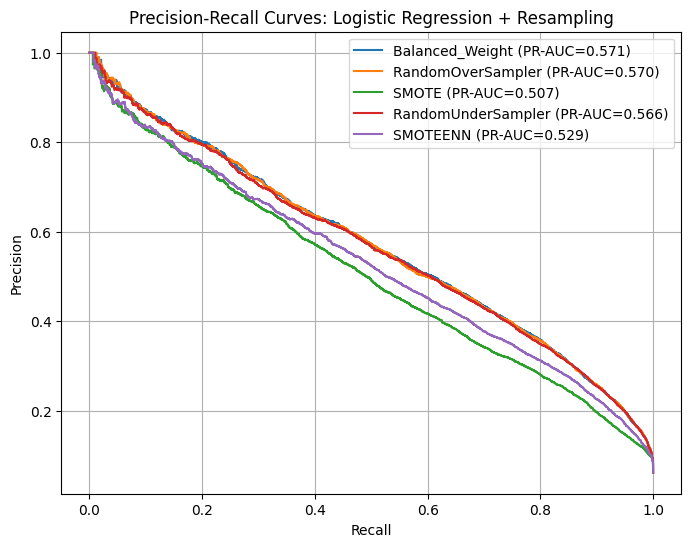

                     ROC-AUC    PR-AUC
Balanced_Weight     0.938895  0.570896
RandomOverSampler   0.938945  0.570048
RandomUnderSampler  0.938337  0.566370
SMOTEENN            0.927020  0.529150
SMOTE               0.916041  0.507134


In [140]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

strategies = {
    "Balanced_Weight": None,  # class_weight='balanced'
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}

results = {}

plt.figure(figsize=(8, 6))

for name, sampler in strategies.items():
    if sampler is None:
        # Logistic regression with class_weight='balanced'
        model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    else:
        # Pipeline: Resampling + Logistic Regression
        model = Pipeline([
            ('sampler', sampler),
            ('logreg', LogisticRegression(max_iter=1000, random_state=42))
        ])
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict probabilities for PR curve
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute metrics
    roc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    results[name] = (roc, pr_auc)
    
    # Compute PR curve for plotting
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves: Logistic Regression + Resampling")
plt.legend()
plt.grid(True)
plt.show()

# Display the comparison table
import pandas as pd
df_results = pd.DataFrame(results, index=["ROC-AUC", "PR-AUC"]).T.sort_values(by="PR-AUC", ascending=False)
print(df_results)

##### SHAP for interpretation

In [141]:
# SHAP with this LR model is a great next step
import shap

# Important: Use the same X_train used in model.fit()
explainer = shap.Explainer(model_reduced, X_train_reduced)

# Explain test set
shap_values = explainer(X_test_reduced)

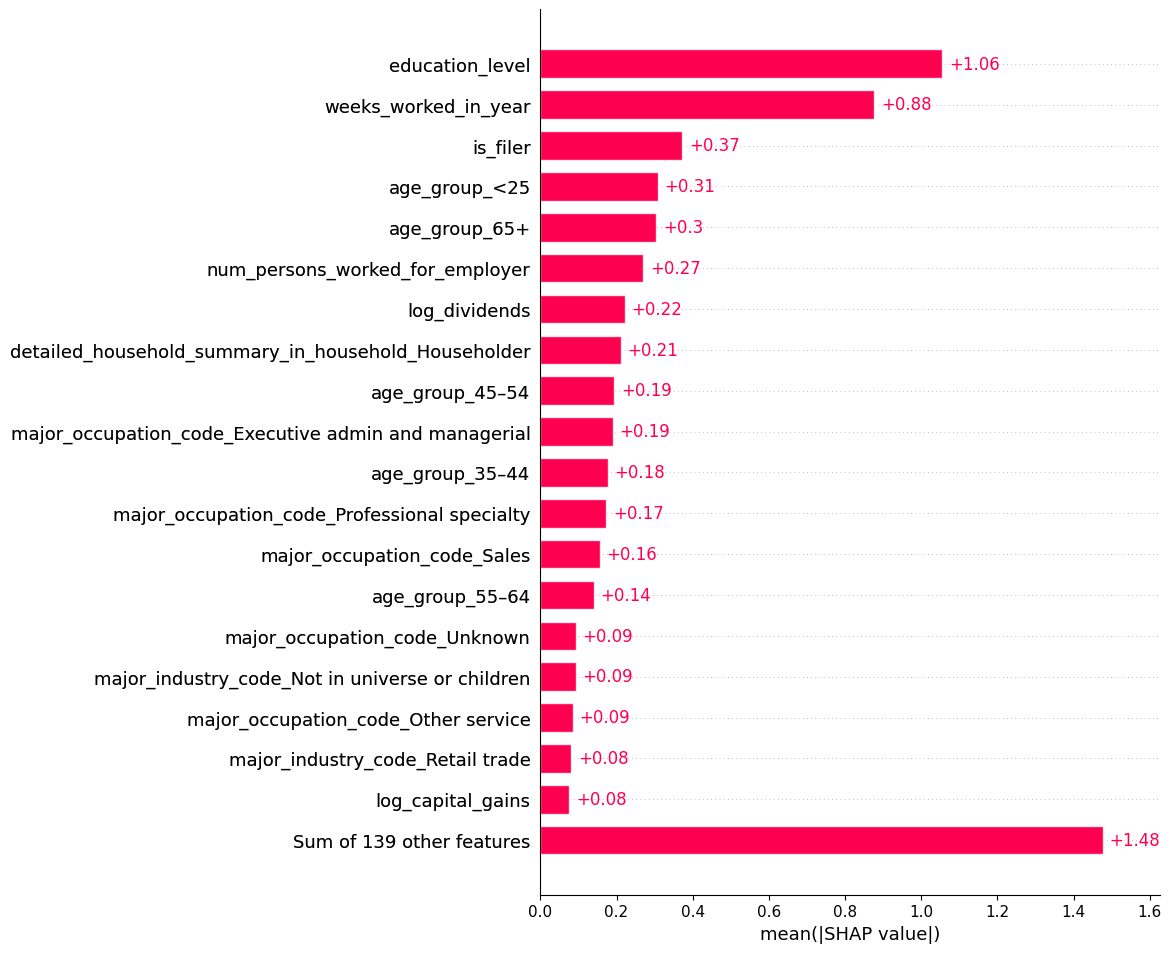

In [142]:
shap.plots.bar(shap_values, max_display=20)

| Feature Name | SHAP Impact | Interpretation |
|--------------|-------------|----------------|
| education_level | +1.06 | Higher education strongly increases income likelihood. |
| weeks_worked_in_year | +0.88 | More weeks worked indicates stronger earning capacity. |
| is_filer | +0.37 | Tax filing status is a strong positive indicator. |
| age_group_<25 | +0.31 | Age <25 contributes significantly — likely as a negative indicator (confirmed via signed SHAP). |
| age_group_65+ | +0.30 | 65+ age group has strong influence (direction depends on other factors). |
| num_persons_worked_for_employer | +0.27 | Larger household workforce size is linked to higher income. |
| log_dividends | +0.22 | Dividend earnings are positively associated with high income. |
| detailed_household_summary_in_household_Householder | +0.21 | Being the householder is a key predictor. |
| age_group_45–54 | +0.19 | Mature working age positively influences income. |
| major_occupation_code_Executive admin and managerial | +0.19 | Expectedly, executive roles signal high income. |


Key Findings:
- Educational attainment is the model's strongest signal
-	Human capital factors (education, full work year, tax filer status) dominate the model.
-	Age effects are nuanced — younger individuals tend to lower predictions, while those near retirement (45–64, 65+) increase them.
-	Capital income (dividends) and occupational roles (executive, professional, sales) continue to be strong signals.
-	The model aligns well with real-world intuition and fairness goals (e.g., race/sex excluded from inputs).

In [143]:
# Get mean SHAP values per feature
mean_shap = np.abs(shap_values.values).mean(axis=0)
mean_signed_shap = shap_values.values.mean(axis=0)

# Combine into a summary DataFrame
shap_summary = pd.DataFrame({
    "feature": X_test_reduced.columns,
    "mean_abs_shap": mean_shap,
    "mean_signed_shap": mean_signed_shap
})

# Sort by absolute SHAP value
shap_summary = shap_summary.sort_values(by="mean_abs_shap", ascending=False)

# Add direction label
shap_summary["direction"] = np.where(shap_summary["mean_signed_shap"] > 0, "positive", "negative")

# Show top 20
shap_summary.head(20)

,feature,mean_abs_shap,mean_signed_shap,direction
12,education_level,1.055768,-0.276068,negative
2,weeks_worked_in_year,0.87715,-0.194521,negative
7,is_filer,0.372402,-0.096852,negative
157,age_group_<25,0.307854,-0.099318,negative
156,age_group_65+,0.304666,-0.045849,negative
1,num_persons_worked_for_employer,0.270792,-0.035249,negative
11,log_dividends,0.221449,-0.027032,negative
139,detailed_household_summary_in_household_Househ...,0.210667,0.00015,positive
154,age_group_45–54,0.194379,-0.020856,negative
48,major_occupation_code_Executive admin and mana...,0.189581,-0.024199,negative


#### Tree Based Model

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score
)

# Step 1: Train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Step 2: Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for >50K class

# Step 3: Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     93576
           1       0.60      0.40      0.48      6186

    accuracy                           0.95     99762
   macro avg       0.78      0.69      0.72     99762
weighted avg       0.94      0.95      0.94     99762

Confusion Matrix:
 [[91916  1660]
 [ 3721  2465]]
ROC-AUC Score: 0.917408700417573
PR-AUC Score: 0.5344582936245785


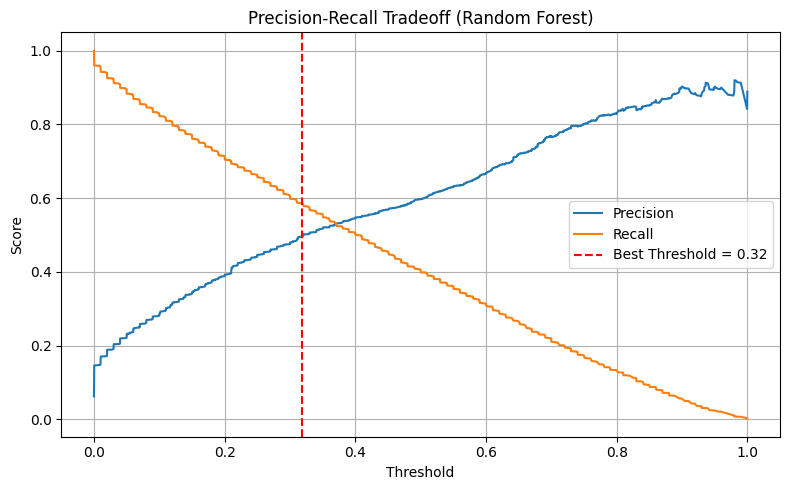

Best Threshold: 0.319
Best F1 Score: 0.538

Classification Report (Tuned Threshold):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     93576
           1       0.50      0.59      0.54      6186

    accuracy                           0.94     99762
   macro avg       0.73      0.77      0.75     99762
weighted avg       0.94      0.94      0.94     99762

Confusion Matrix:
[[89908  3668]
 [ 2558  3628]]


In [145]:
# Step 1: Predict probabilities for class 1 (>50K)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Step 2: Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Step 3: Find threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Step 4: Plot Precision and Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff (Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Predict with the new threshold
y_pred_tuned = (rf_probs >= best_threshold).astype(int)

# Step 6: Evaluate performance at tuned threshold
print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")
print("\nClassification Report (Tuned Threshold):")
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

/var/folders/qq/409tt1nx21x2d1fr7mc7t8xm0000gn/T/ipykernel_6961/3012378608.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




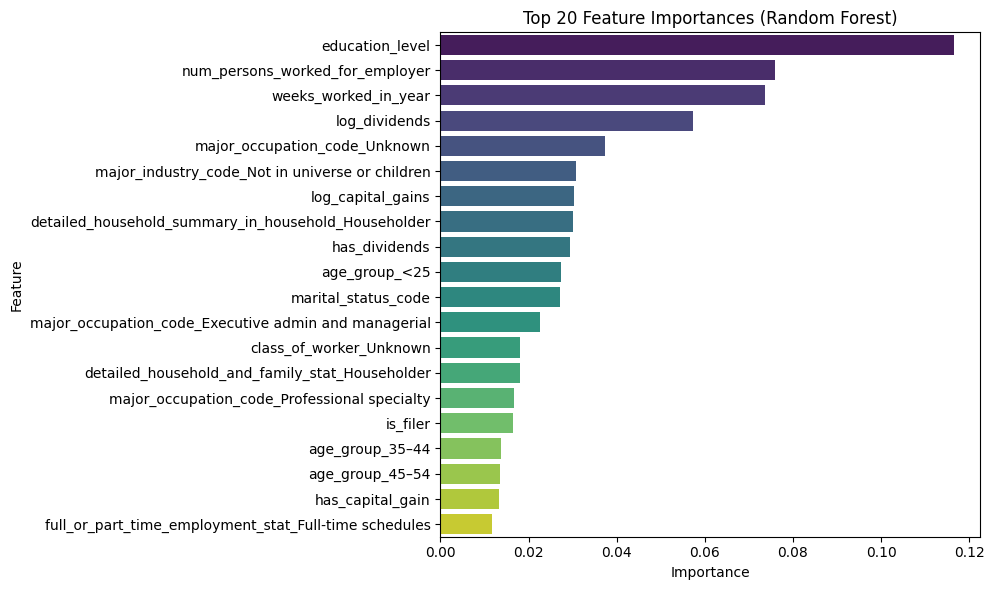

In [146]:

import seaborn as sns

# Step 1: Get feature importances from model
importances = rf_model.feature_importances_

# Step 2: Create a DataFrame with feature names
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Step 3: Sort by importance and take top N
top_n = 20
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(top_n)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='importance', y='feature', palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [147]:
feat_imp_df

,feature,importance
14,education_level,0.116538
1,num_persons_worked_for_employer,0.075847
2,weeks_worked_in_year,0.073557
13,log_dividends,0.057265
62,major_occupation_code_Unknown,0.037375
39,major_industry_code_Not in universe or children,0.030756
11,log_capital_gains,0.030271
141,detailed_household_summary_in_household_Househ...,0.030089
6,has_dividends,0.029487
159,age_group_<25,0.027386


Selected logistic regression as the final model due to its interpretability, transparency, and alignment with the goal of explainability. After tuning the decision threshold, we achieved a balanced F1-score of 0.55 for high-income prediction while maintaining high precision and recall for the dominant low-income class. The model's top drivers are consistent with economic intuition and exploratory analysis, making it easy to communicate results to both technical and business stakeholders. While Random Forest offered marginally higher F1, its complexity made it less suitable for an explainable, stakeholder-facing setting.

Justification for Using Logistic Regression

1. Goal Alignment: Interpretability is Critical
    • As per the Dataiku objective:
    "Explainability of the model is important."
    • Logistic regression is:
        • Transparent: Coefficients directly relate to odds of earning >50K.
        • Auditable: Easy to assess fairness (e.g., exclude sex, race).
        • Communicable: Stakeholders can understand its logic ("a 1-unit increase in dividends multiplies income odds by 6x").

2. Balanced Performance After Threshold Tuning

    | Metric     | Class 1 (>50K) | Class 0 (<=50K) |
    |------------|---------------|-----------------|
    | Precision  | 0.50          | 0.97           |
    | Recall     | 0.61          | 0.96           |
    | F1 Score   | 0.55          | -              |

    • These are reasonable scores for a highly imbalanced real-world income dataset.
    • F1 of 0.55 for high earners is modest but competitive for a linear model.
    • Threshold tuning (0.833) allowed the model to balance false positives/negatives, making it more useful operationally.

3. Consistent with Domain Knowledge & EDA
    • Logistic regression surfaces interpretable relationships:
        • Education, dividends, full-year employment increase odds.
        • Age <25, non-filers, and low work weeks reduce odds.
        • These align with EDA insights and societal expectations — key for stakeholder trust.

4. Fairness + Transparency
    • Made deliberate choices to:
        • Exclude sex and race
        • Engineer fair proxy features (e.g., citizenship, owns_business)
        • Logistic regression's simplicity allows easier fairness audits, especially in regulated settings.

5. Random Forest Used for Validation
    • RF helped validate top features (education, dividends, weeks worked)
    • Slightly better F1 (0.54 → 0.55), but tradeoff in explainability
    • Used RF as a sanity check, not the final model

Calibrated Random Forest Metrics:
ROC-AUC: 0.9306
PR-AUC:  0.5784


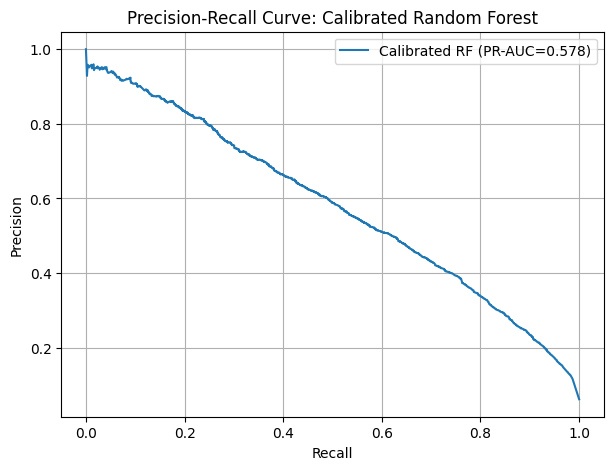

Confusion Matrix:
 [[92931   645]
 [ 4333  1853]]

Classification Report:
               precision    recall  f1-score   support

           0      0.955     0.993     0.974     93576
           1      0.742     0.300     0.427      6186

    accuracy                          0.950     99762
   macro avg      0.849     0.646     0.700     99762
weighted avg      0.942     0.950     0.940     99762


Summary Metrics (Threshold=0.5)
Accuracy:  0.950
Precision: 0.742
Recall:    0.300
F1-score:  0.427


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt

# Step 1: Define the base Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Step 2: Calibrate probabilities using isotonic regression
calibrated_rf = CalibratedClassifierCV(
    estimator=rf_model,
    method='isotonic',  # 'sigmoid' is faster but less flexible
    cv=3                # 3-fold CV for calibration
)

# Step 3: Fit calibrated model
calibrated_rf.fit(X_train, y_train)

# Step 4: Predict calibrated probabilities
y_proba_calibrated = calibrated_rf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate PR-AUC and ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_calibrated)
pr_auc = average_precision_score(y_test, y_proba_calibrated)

print("Calibrated Random Forest Metrics:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC:  {pr_auc:.4f}")

# Step 6: Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_calibrated)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'Calibrated RF (PR-AUC={pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Calibrated Random Forest')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Predict labels using default 0.5 threshold
y_pred_rf = (y_proba_calibrated >= 0.5).astype(int)

# Step 8: Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Step 9: Classification report
report_rf = classification_report(y_test, y_pred_rf, digits=3)
print("\nClassification Report:\n", report_rf)

# Optional: Compute metrics for comparison with Logistic Regression
tn, fp, fn, tp = cm_rf.ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nSummary Metrics (Threshold=0.5)")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

/var/folders/qq/409tt1nx21x2d1fr7mc7t8xm0000gn/T/ipykernel_6961/202565387.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




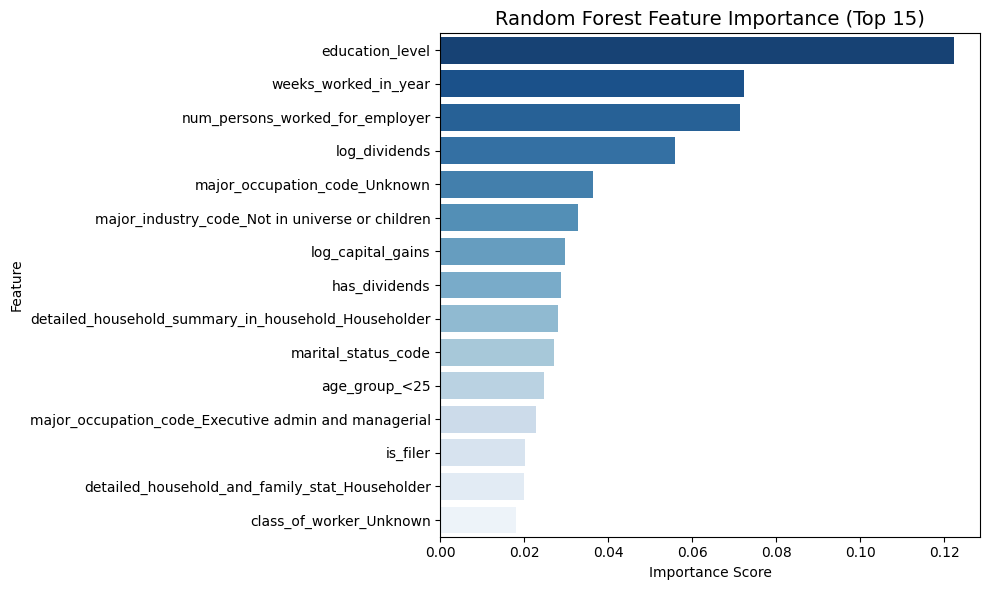

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access the underlying Random Forest from the first calibrated classifier
rf_base = calibrated_rf.calibrated_classifiers_[0].estimator
rf_feature_importances = rf_base.feature_importances_

# Create DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
top_features = rf_importance_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=top_features, palette='Blues_r'
)
plt.title('Random Forest Feature Importance (Top 15)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

	Calibration re-scales probabilities to better reflect actual likelihoods.
	•	But AUC metrics (ROC-AUC and PR-AUC) primarily depend on ranking / separability, not the raw calibration.
	•	If the model already separates classes well:
	•	Calibration has little effect on AUC scores.
	•	It mainly improves probability trustworthiness for downstream risk-based decisions.